### Data Analysis of Covid 19 Tweets




In [1]:
import pandas as pd
import numpy as np

In [2]:
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv("C:\\Users\\prabh\\Downloads\\Capstone Project\\Finance_tweets.csv")

In [5]:
# Preview
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Andrea Toucinho,"Paris, France","Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False
1,TMJ-RIP Finance Jobs,"Providence, RI",Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False
2,World Finance News,United States,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False
3,Comidoc,"Paris, France",I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False
4,motionfinity,"Geesthacht, Deutschland",Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False


# Data Cleaning

In [6]:
# Check Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
df.describe()

,user_followers,user_friends,user_favourites
count,3.012400e+04,30124.000000,30124.000000
mean,9.087923e+03,1105.150744,2848.191840
std,9.575768e+04,4807.241416,12618.583287
min,0.000000e+00,0.000000,0.000000
25%,1.750000e+02,80.000000,1.000000
50%,3.790000e+02,142.000000,82.000000
75%,2.005000e+03,646.000000,944.000000
max,1.023660e+07,375274.000000,422316.000000


In [8]:
# Datatype
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [9]:
Desc = df.describe().T
Desc.to_csv('Twitter Sentiment Dictionary.csv',index = True)

In [10]:
# Source/ Value Count/Distribution of the Sources
df['source'].unique()

array(['Twitter for Android', 'CareerArc 2.0', 'WorldFinNews',
       'comidoc_net_api', 'Twitter for iPhone', 'Twitter Web App',
       'HubSpot', 'SAArticlesTwitter', 'LiquiditySquawk',
       'Tabbed News Tweet', 'Revive Social App', 'stylelib.org',
       'Hootsuite Inc.', 'themacrotweet', 'Buffer',
       'Microsoft Power Platform', 'dlvr.it', 'DailyBusiness',
       'SocialBee.io v2', 'Penname', 'Powered by Sprinklr', 'IFTTT',
       'WordPress.com', 'BitSwingsTwit',
       'Uncanny Automator for WordPress', 'Postly-Fast Content Scheduler',
       'Locus API', 'CORPUS_NEWS', 'Publer.io', 'EveryoneSocial',
       'Agorapulse app', 'Planable', 'Crowdfire App', 'Handshake SLDs',
       '0x4wouaKd5', 'SocialPilot.co', 'LinkedIn', 'Sendible',
       'SmarterQueue', 'TweetDeck', 'capitalhungry', 'Sprout Social',
       'SFE Robot1', 'Twitter for iPad', 'Twittimer', 'Dynamic Signal',
       'Zoho Social', 'stat_bot', 'Greatly Social Twitter',
       'CORE ListingMachine', 'Dynamic Tweet

In [11]:
# Source/ Value Count/Distribution of the Sources
df['source'].value_counts()

Twitter Web App        5529
EagleEyeStock          3427
Twitter for Android    2564
Twitter for iPhone     1341
EagleEyeStockAPP3      1233
                       ... 
NeMP9wkWNF                1
Boursier.com              1
qgsignals                 1
NetSocialApp              1
CryptoDailynews           1
Name: source, Length: 324, dtype: int64

In [12]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30)

Twitter Web App                    5529
EagleEyeStock                      3427
Twitter for Android                2564
Twitter for iPhone                 1341
EagleEyeStockAPP3                  1233
Hootsuite Inc.                     1179
CareerArc 2.0                      1129
LiquiditySquawk                    1110
IFTTT                               920
Microsoft Power Platform            770
Buffer                              680
Revive Social App                   566
DailyBusiness                       563
SAArticlesTwitter                   500
WorldFinNews                        442
themacrotweet                       441
insiders_analytics                  419
WordPress.com                       350
TweetDeck                           345
Uncanny Automator for WordPress     328
Perfect Essays                      311
HubSpot                             306
CryptoNewswire                      290
dlvr.it                             266
LinkedIn                            251


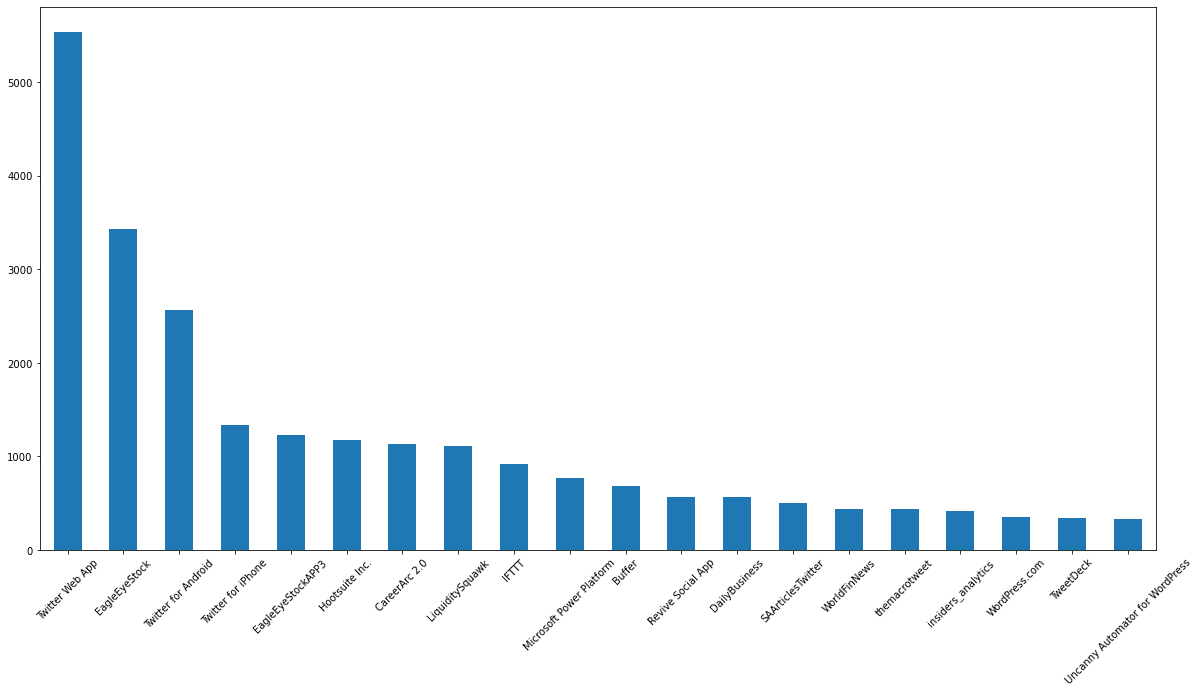

In [13]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

This Bar Graph repesent the 'source' of users through which they entered the data.  

#### Text Analysis of tweet

In [14]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [16]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df['text'].iloc[2]

'39% of US Millennials Hold Crypto Assets, Report Says - https://t.co/LHlMTXYuXq #businessnews #finance #marketnews'

### Noise
+ remove mentions/userhandles
+ remove hashtags
+ urls
+ Special Characters


In [18]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Andrea Toucinho,"Paris, France","Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False
1,TMJ-RIP Finance Jobs,"Providence, RI",Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False
2,World Finance News,United States,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False
3,Comidoc,"Paris, France",I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False
4,motionfinity,"Geesthacht, Deutschland",Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False


In [19]:
df['text'].apply(nfx.extract_hashtags)

0              [#innovation, #payments, #Europe, #Finance]
1                                     [#Finance, #Quincy,]
2                   [#businessnews, #finance, #marketnews]
3        [#Udemy, #Value, #Investing, #Quantitative, #F...
4        [#Brexit, #BrexitNews, #BrexitReality, #Brexit...
                               ...                        
30119    [#TATACONSUM, #investing, #nifty, #nifty50, #S...
30120    [#Maths,, #Biology,, #Chemistry,, #Statistics,...
30121                                  [#crypto, #finance]
30122    [#earnmoneyonline, #money, #finance, #free, #m...
30123    [#elegant, #v, #bull, #logo, #logoground, #hor...
Name: text, Length: 30124, dtype: object

In [20]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [21]:
df.head()[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,"[#innovation, #payments, #Europe, #Finance]","['innovation', 'payments', 'Europe', 'Finance']"
1,"[#Finance, #Quincy,]","['Finance', 'Quincy']"
2,"[#businessnews, #finance, #marketnews]","['businessnews', 'finance', 'marketnews']"
3,"[#Udemy, #Value, #Investing, #Quantitative, #F...","['Udemy','Value','Investing','Quantitative','F..."
4,"[#Brexit, #BrexitNews, #BrexitReality, #Brexit...","['Brexit', 'BrexitNews', 'BrexitReality', 'Bre..."


In [22]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [23]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","In Berlin, Germany 🇩🇪, ready for @mpecosystem ..."
1,Click the link in our bio to see currently ope...,Click the link in our bio to see currently ope...
2,"39% of US Millennials Hold Crypto Assets, Repo...","39% of US Millennials Hold Crypto Assets, Repo..."
3,Investment Portfolio Optimization with Excel &...,Investment Portfolio Optimization with Excel &...
4,#Brexit daily #BrexitNews day #BrexitReality #...,daily day ...
...,...,...
30119,Important Intraday Levels for Next Session\nSt...,Important Intraday Levels for Next Session\nSt...
30120,Hey y'all we taking online classes in \n #Math...,Hey y'all we taking online classes in \n ...
30121,Learn About the Best Strategies to Profit from...,Learn About the Best Strategies to Profit from...
30122,Check out @rewardy_app where you can earn real...,Check out @rewardy_app where you can earn real...


In [24]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [25]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","In Berlin, Germany 🇩🇪, ready for 2022.\n ..."
1,Click the link in our bio to see currently ope...,Click the link in our bio to see currently ope...
2,"39% of US Millennials Hold Crypto Assets, Repo...","39% of US Millennials Hold Crypto Assets, Repo..."
3,Investment Portfolio Optimization with Excel &...,Investment Portfolio Optimization with Excel &...
4,#Brexit daily #BrexitNews day #BrexitReality #...,daily day ...
...,...,...
30119,Important Intraday Levels for Next Session\nSt...,Important Intraday Levels for Next Session\nSt...
30120,Hey y'all we taking online classes in \n #Math...,Hey y'all we taking online classes in \n ...
30121,Learn About the Best Strategies to Profit from...,Learn About the Best Strategies to Profit from...
30122,Check out @rewardy_app where you can earn real...,Check out where you can earn real money onli...


In [26]:
print("Before Removal of hashtags: ")
df['text'].iloc[10]

Before Removal of hashtags: 


'The #ClimateCrisis is a pressing issue and as both conferences @london_climate #CIF22 and @ResetConnect urged - #sustainability needs to embed to everything - from #mobility to #events to #finance to #energy to #food - we’ve been reflecting deeply on how best we support 🌿 https://t.co/ep6K28tNLl'

In [27]:
print("After Removal of hashtags: ")
df['clean_tweet'].iloc[10]

After Removal of hashtags: 


'The   is a pressing issue and as both conferences     and   urged -   needs to embed to everything - from   to   to   to   to   - we’ve been reflecting deeply on how best we support 🌿 https://t.co/ep6K28tNLl'

In [28]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [29]:
print("Before Removal of urls: ")
df['text'].iloc[10]

Before Removal of urls: 


'The #ClimateCrisis is a pressing issue and as both conferences @london_climate #CIF22 and @ResetConnect urged - #sustainability needs to embed to everything - from #mobility to #events to #finance to #energy to #food - we’ve been reflecting deeply on how best we support 🌿 https://t.co/ep6K28tNLl'

In [30]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [31]:
print("After Removal of urls: ")
df['clean_tweet'].iloc[10]

After Removal of urls: 


'The is a pressing issue and as both conferences and urged - needs to embed to everything - from to to to to - we’ve been reflecting deeply on how best we support 🌿 '

In [32]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [33]:
# Remove_special_characters
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

In [34]:
#change the text in lower case
df["clean_tweet"] = df.clean_tweet.str.lower() 

In [35]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...",in berlin germany ready for 2022
1,Click the link in our bio to see currently ope...,click the link in our bio to see currently ope...
2,"39% of US Millennials Hold Crypto Assets, Repo...",39 of us millennials hold crypto assets report...
3,Investment Portfolio Optimization with Excel &...,investment portfolio optimization with excel a...
4,#Brexit daily #BrexitNews day #BrexitReality #...,daily day
...,...,...
30119,Important Intraday Levels for Next Session\nSt...,important intraday levels for next sessionstoc...
30120,Hey y'all we taking online classes in \n #Math...,hey yall we taking online classes in and exams...
30121,Learn About the Best Strategies to Profit from...,learn about the best strategies to profit from...
30122,Check out @rewardy_app where you can earn real...,check out where you can earn real money online...


In [36]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet
0,Andrea Toucinho,"Paris, France","Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False,"[#innovation, #payments, #Europe, #Finance]",in berlin germany ready for 2022
1,TMJ-RIP Finance Jobs,"Providence, RI",Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False,"[#Finance, #Quincy,]",click the link in our bio to see currently ope...
2,World Finance News,United States,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False,"[#businessnews, #finance, #marketnews]",39 of us millennials hold crypto assets report...
3,Comidoc,"Paris, France",I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False,"[#Udemy, #Value, #Investing, #Quantitative, #F...",investment portfolio optimization with excel a...
4,motionfinity,"Geesthacht, Deutschland",Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False,"[#Brexit, #BrexitNews, #BrexitReality, #Brexit...",daily day


### Sentiment Analysis

In [37]:
#pip install TextBlob

In [39]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [40]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [41]:
get_sentiment(ex1)

{'polarity': 0.2, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [42]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [43]:
df['sentiment_results']

0        {'polarity': 0.2, 'subjectivity': 0.5, 'sentim...
1        {'polarity': 0.0, 'subjectivity': 0.5, 'sentim...
2        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                               ...                        
30119    {'polarity': 0.2, 'subjectivity': 0.5, 'sentim...
30120    {'polarity': 0.375, 'subjectivity': 0.5, 'sent...
30121    {'polarity': 1.0, 'subjectivity': 0.3, 'sentim...
30122    {'polarity': 0.2, 'subjectivity': 0.3000000000...
30123    {'polarity': 0.5, 'subjectivity': 1.0, 'sentim...
Name: sentiment_results, Length: 30124, dtype: object

In [44]:
df['sentiment_results'].iloc[0]

{'polarity': 0.2, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [45]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.2,0.5,Positive


In [46]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [47]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,Andrea Toucinho,"Paris, France","Consultante, Conférencière, Journaliste, Auteu...",2017-12-04 16:21:52+00:00,1314,2031,2812,False,2022-07-04 19:09:10+00:00,"In Berlin, Germany 🇩🇪, ready for @mpecosystem ...","['innovation', 'payments', 'Europe', 'Finance']",Twitter for Android,False,"[#innovation, #payments, #Europe, #Finance]",in berlin germany ready for 2022,"{'polarity': 0.2, 'subjectivity': 0.5, 'sentim...",0.2,0.5,Positive
1,TMJ-RIP Finance Jobs,"Providence, RI",Follow this account for geo-targeted Finance j...,2009-04-22 11:28:51+00:00,283,185,0,False,2022-07-04 19:09:02+00:00,Click the link in our bio to see currently ope...,"['Finance', 'Quincy']",CareerArc 2.0,False,"[#Finance, #Quincy,]",click the link in our bio to see currently ope...,"{'polarity': 0.0, 'subjectivity': 0.5, 'sentim...",0.0,0.5,Neutral
2,World Finance News,United States,Critical insights and analysis on Finance in t...,2022-03-11 19:06:05+00:00,1097,153,380,False,2022-07-04 19:08:58+00:00,"39% of US Millennials Hold Crypto Assets, Repo...","['businessnews', 'finance', 'marketnews']",WorldFinNews,False,"[#businessnews, #finance, #marketnews]",39 of us millennials hold crypto assets report...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
3,Comidoc,"Paris, France",I'm a bot ! \nI post only *FREE* Udemy courses...,2018-06-21 14:51:57+00:00,3786,0,32585,False,2022-07-04 19:08:53+00:00,Investment Portfolio Optimization with Excel &...,"['Udemy','Value','Investing','Quantitative','F...",comidoc_net_api,False,"[#Udemy, #Value, #Investing, #Quantitative, #F...",investment portfolio optimization with excel a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
4,motionfinity,"Geesthacht, Deutschland",Business Management │ Smart Brexit Solutions │...,2019-08-05 18:33:27+00:00,66,333,1374,False,2022-07-04 19:07:30+00:00,#Brexit daily #BrexitNews day #BrexitReality #...,"['Brexit', 'BrexitNews', 'BrexitReality', 'Bre...",Twitter for iPhone,False,"[#Brexit, #BrexitNews, #BrexitReality, #Brexit...",daily day,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral


In [48]:
df['sentiment'].value_counts()

Positive    13676
Neutral     12979
Negative     3469
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

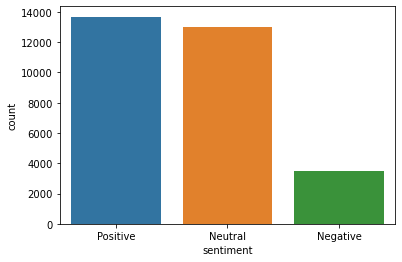

In [49]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [50]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    percentage = pd.concat([total,percentage],axis=1,keys=['Total','Percentage(%)'])
    percentage['Percentage(%)'] = percentage['Percentage(%)'].astype('string')
    percentage["Percentage(%)"]= percentage["Percentage(%)"]+"%"
    return percentage
 

In [51]:
#Count_values for sentiment
count_values_in_column(df,"sentiment")

,Total,Percentage(%)
Positive,13676,45.4%
Neutral,12979,43.09%
Negative,3469,11.52%


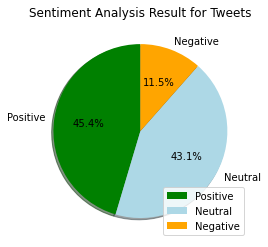

In [52]:
# create data for Pie Chart
pichart = count_values_in_column(df,"sentiment")
names= pichart.index
pichart['Percentage(%)'] = pichart['Percentage(%)'].str.replace('%', '')
size=pichart["Percentage(%)"]
  
# Create a circle for the center of the plot
my_circle=plt.Circle( (1,2), 0.67, color='white')
plt.title("Sentiment Analysis Result for Tweets" )
plt.pie(size, labels=names, colors=['green','lightblue','orange'], autopct='%1.1f%%', shadow=True, startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [53]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [54]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [55]:
positive_tweet

0                       in berlin germany  ready for 2022 
7        turnkey lenders equipment financing platform i...
8        einvoicing soon to be mandated for units with ...
9        check out where you can earn real money online...
10       the is a pressing issue and as both conference...
                               ...                        
30119    important intraday levels for next sessionstoc...
30120    hey yall we taking online classes in and exams...
30121    learn about the best strategies to profit from...
30122    check out where you can earn real money online...
30123                                elegant v bull logo  
Name: clean_tweet, Length: 13676, dtype: object

In [56]:
neutral_tweet

1        click the link in our bio to see currently ope...
2        39 of us millennials hold crypto assets report...
3        investment portfolio optimization with excel a...
4                                               daily day 
5                               bankstack io for sale 279 
                               ...                        
30101     chart the crypto projects stealing from their...
30102                         junior staff accountant at  
30108    we have 32 jobs open today in check them out v...
30110     data science for business what you need to kn...
30113    problems like overdue accounts are only tempor...
Name: clean_tweet, Length: 12979, dtype: object

In [57]:
negative_tweet

16       intimidation at the local level has forced ele...
18       intimidation at the local level has forced ele...
20                   breath and for little ones  wellness 
30       click the link in our bio to see currently ope...
32       crypto lender celsius cuts 150 jobs citing ext...
                               ...                        
30078              is in serious rapid deceleration in q2 
30083    the ukraine war is weakening the russian milit...
30088     warning the wagon is not coming down the street 
30104     0715 nvda calls over 155ba calls over 148 due...
30105    the hectic pace that accompanies the completio...
Name: clean_tweet, Length: 3469, dtype: object

In [58]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [59]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [60]:
positive_tweet_list 

['berlin germany ready 2022',
 'turnkey lenders equipment financing platform aibased solution provides automation instant credit decisioning increase revenue deepen client relationships learn equipment financing automation',
 'einvoicing soon mandated units 10cr turnoverlink bio details instagramtaxyog facebooktaxyog linkedintaxyog social media dept',
 'check earn real money online watching streams sign rewardy link started bonus',
 'pressing issue conferences urged needs embed weve reflecting deeply best support',
 'cbic creating sop soon enforcement actions gst officerslink bio details instagramtaxyog facebooktaxyog linkedintaxyog social media dept',
 'recommend job il click link bio patient accounts analyst uchicago medicine',
 'short offers yield ease use traditional financialservices products available purchase lets talk',
 'check blog discuss offering flexible payment options customers benefit business ways read',
 'check earn real money online watching streams sign rewardy link 

In [61]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

berlin
germany
ready
2022
turnkey
lenders
equipment
financing
platform
aibased
solution
provides
automation
instant
credit
decisioning
increase
revenue
deepen
client
relationships
learn
equipment
financing
automation
einvoicing
soon
mandated
units
10cr
turnoverlink
bio
details
instagramtaxyog
facebooktaxyog
linkedintaxyog
social
media
dept
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
pressing
issue
conferences
urged
needs
embed
weve
reflecting
deeply
best
support
cbic
creating
sop
soon
enforcement
actions
gst
officerslink
bio
details
instagramtaxyog
facebooktaxyog
linkedintaxyog
social
media
dept
recommend
job
il
click
link
bio
patient
accounts
analyst
uchicago
medicine
short
offers
yield
ease
use
traditional
financialservices
products
available
purchase
lets
talk
check
blog
discuss
offering
flexible
payment
options
customers
benefit
business
ways
read
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
italy
rate
housing
water

data
new
job
opportunityjunior
account
manager
role
apply
graduates
happy
4th
july
hope
wonderful
holiday
weekend
enjoys
time
loved
ones
safe
travels
celebrate
4th
running
flash
sale
use
code
freedom
20
registration
fee
711
lly
pfe
eli
lillys
market
cap
higher
pfizers
anomaly
wont
director
join
dynamic
team
based
ottawa
office
director
accountable
financial
health
firm
overseeing
accounting
credit
treasury
functions
learn
apply
maybe
sweet
spirit
prepared
posted
karaoke
understands
business
business
amp
chemistry
plus
business
pay
determinedsacrificial
amp
wanted
new
line
social
media
influencers
regulated
govt
especially
finance
experts
jo
har
kisi
ko
financial
freedom
ka
paath
padhane
lage
hain
peeps
need
arrange
contractor
cover
tips
best
deal
great
offerings
know
latest
co
job
opportunity
click
link
bio
apply
fund
reporting
senior
analyst
hybrid
ssampc
technologies
damaging
allegations
trump
coming
jan
6th
hearings
true
far
damaging
allegations
trump
coming
jan
6th
hearings
true
fa

keywords
resume
hiring
manager
fl
latest
mn
job
opportunity
click
link
bio
apply
business
finance
accounts
receivable
manager
sevita
abt
abbott
successfully
handled
infant
formula
crisis
dont
word
reading
website
information
pricevolumedelivery
4th
vs
1st
july
consider
buy
gt
4
july
high
screenshot
violated
target
sl
discretion
easiest
gift
online
provide
free
registrar
acc
pw
thats
need
gift
lifetime
domain
hey
kitsu
usdt
pool
created
special
airdrops
deployed
liquidity
pool
providers
hodlers
build
healthiest
largest
community
want
work
sage
title
group
hiring
va
click
link
bio
details
job
settlement
attorney
advisor
business
owners
exit
strategy
agenda
wealth
manager
experienced
senior
business
owner
clients
monetization
movement
read
weve
listed
easy
changes
finances
help
reach
retirement
goals
featured
latest
article
weve
listed
easy
changes
finances
help
reach
retirement
goals
featured
latest
article
agile
consultants
hiring
senior
accountant
client
trading
industry
based
dubai
ap

69s1
677s2
664s3
653
abu
dhabi
judicial
department
adjd
hosted
webinar
procedures
needed
combat
money
laundering
responsibility
legal
experts
happy
monday
team
pearl
remember
youre
closer
achieving
goals
dream
begin
boldness
genius
power
magic
goethe
important
intraday
levels
sessionstock
r3
252433r2
248317r1
244843close
24137s1
237253s2
233137s3
229663
position
requires
candidate
lead
finance
team
nasksoft
responsible
company
accounts
budgeting
business
planning
financial
projection
taxation
auditing
corporate
affairs
important
intraday
levels
sessionstock
r3
1345r2
13205r1
13055close
12905s1
1266s2
12415s3
12265
important
intraday
levels
sessionstock
r3
9212r2
9038r1
8897close
8755s1
8582s2
8408s3
8267
youve
business
case
new
planning
secured
executive
buyin
learn
choose
right
solution
free
guide
important
intraday
levels
sessionstock
r3
66853r2
66217r1
65378close
6454s1
63903s2
63267s3
62428
important
intraday
levels
sessionstock
r3
1555r2
1535r1
152close
1505s1
1485s2
1465s3
145
ma

consultation
happy
independence
day
honor
fourth
july
westfield
bank
locations
closed
today
accountancy
finance
companies
rely
ats
tools
help
sorting
countless
job
applications
competitive
landscape
cv
ats
ready
touch
01753
621902
12
texas
commercial
real
estate
lenders
read
important
intraday
levels
sessionstock
vixr3
2317r2
2271r1
2184close
2097s1
2051s2
2005s3
1918
global
employer
flex
provides
competitive
benefits
plus
working
social
environment
delivers
employees
click
learn
team
analyst
accounts
payable
tn
important
intraday
levels
sessionstock
r3
24268r2
23772r1
23493close
23215s1
22718s2
22222s3
21943
waiting
right
opportunitygrab
start
investing
earning
infinitechh2020
presents
skills
survey
survey
aims
identifying
important
high
indemand
skills
digital
professions
answers
important
intraday
levels
sessionstock
r3
37233r2
36902r1
36603close
36305s1
35973s2
35642s3
35343
financial
coaching
stepping
stone
seeking
financial
advice
talks
abraham
financial
coaching
standalone
cover

36488r1
36201close
35914s1
355535s2
35193s3
34906
hh
sayyida
wisam
jaifar
alsaid
head
marketing
amp
communications
discusses
sustainability
islamic
banking
financial
inclusion
enlightening
segment
oman
banks
association
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
amej
coin
topmost
secure
token
platform
makes
crypto
transactions
secure
easy
sign
important
intraday
levels
sessionstock
r3
376525r2
372235r1
368095close
363955s1
359665s2
355375s3
351235
high
cash
circulation
aids
current
rbi
policy
important
intraday
levels
sessionstock
r3
18075r2
1788r1
176close
1732s1
17125s2
1693s3
1665
important
intraday
levels
sessionstock
r3
18442r2
180945r1
17755close
174155s1
17068s2
167205s3
16381
important
intraday
levels
sessionstock
r3
13892r2
13646r1
13412close
13178s1
12932s2
12686s3
12452
join
trump
hotels
team
latest
job
opening
important
intraday
levels
sessionstock
r3
5465r2
5367r1
53085close
525s1
5152s2
5054s3
49955
securities
exchange
board
india
sebi
t

services
regulatory
agenda
register
follow
accurate
signals
lovely
feedback
revision
workshop
attendee
click
find
need
sign
free
middleman
retail
smb
banking
lot
enrich
intelligently
visualize
customer
transaction
data
drive
transformative
customer
experience
accurate
individually
personalized
crosssells
chinas
real
estate
crisis
deepens
big
shanghai
developer
defaults
cnn
guide
making
right
investment
helps
lead
better
lifecontact
today
glimpse
todays
active
stocks
tchinical
analisys
update
1225stock
30
min
rsi
611630
min
rsi
comment
strong
positive
bais30
min
histogram
008
bearish
wealth
experience
creating
road
maps
success
youre
forming
new
sole
trader
business
planning
corporate
merger
provide
clarity
direction
discover
uk
finance
collects
aggregates
wide
range
data
sets
relating
consumer
business
finance
inform
industry
latest
trends
developments
sector
read
gbpjpy
sell
sl
tp
know
detailed
analysis
dm
tchinical
analisys
update
1225stock
30
min
rsi
582130
min
rsi
comment
strong
po

colleague
join
team
experience
compliance
budgeting
apply
improve
energy
access
15
countries
region
long
way
supporting
ecowas
regional
electricity
regulatory
authority
source
africa
energy
portal
post
job
usa
free
app
visit
tchinical
analisys
update
1225stock
30
min
rsi
513930
min
rsi
comment
strong
positive
bais30
min
histogram
001
bearish
tchinical
analisys
update
1225stock
30
min
rsi
601530
min
rsi
comment
strong
positive
bais30
min
histogram
1329
bullish
tchinical
analisys
update
1225stock
30
min
rsi
662930
min
rsi
comment
strong
positive
bais30
min
histogram
672
bullish
tchinical
analisys
update
1225stock
30
min
rsi
699930
min
rsi
comment
strong
positive
bais30
min
histogram
008
bullish
new
ep
produced
partnership
guests
include
stuart
haire
time
recording
brooke
brown
simon
williams
brand
strategist
link
financial
decisions
important
week
smart
decisions
tchinical
analisys
update
1225stock
30
min
rsi
625130
min
rsi
comment
strong
positive
bais30
min
histogram
681
bullish
tchinic

analisys
update
1225stock
30
min
rsi
627430
min
rsi
comment
strong
positive
bais30
min
histogram
631
bullish
consumers
care
values
company
care
quality
products
tchinical
analisys
update
1225stock
30
min
rsi
561330
min
rsi
comment
strong
negative
bais30
min
histogram
009
bullish
selects
orchestrate
custody
operations
enabling
continue
setting
agenda
integration
traditional
read
story
tchinical
analisys
update
1225stock
30
min
rsi
65330
min
rsi
comment
strong
positive
bais30
min
histogram
049
bullish
tell
class
new
free
brilliant
way
gain
valuable
insight
careers
learn
tube
video
12th
sector
world
amazing
dont
sleep
movement
absolutely
huge
regulation
comes
crypto
corporations
hold
balance
sheets
rich
tchinical
analisys
update
1225stock
30
min
rsi
603430
min
rsi
comment
strong
positive
bais30
min
histogram
089
bullish
tchinical
analisys
update
1225stock
30
min
rsi
678430
min
rsi
comment
strong
positive
bais30
min
histogram
222
bullish
tchinical
analisys
update
1225stock
30
min
rsi
70393

tchinical
analisys
update
1225stock
30
min
rsi
571730
min
rsi
comment
strong
negative
bais30
min
histogram
017
bullish
heres
bond
etf
report
investors
slowly
getting
bonds
cautiously
putting
money
safest
ones
join
insiders
gain
access
free
1
hour
debt
webinar
follow
social
media
platforms
instagram
tangiblemiddleeast
youtube
tangible
middle
east
investments
twitter
tangiblemei
tchinical
analisys
update
1225stock
30
min
rsi
692830
min
rsi
comment
strong
positive
bais30
min
histogram
083
bullish
tchinical
analisys
update
1225stock
30
min
rsi
510730
min
rsi
comment
strong
positive
bais30
min
histogram
079
bearish
tchinical
analisys
update
1225stock
30
min
rsi
595830
min
rsi
comment
strong
negative
bais30
min
histogram
114
bullish
key
feature
indicator
week
pivot
traders
use
pivot
target
level
projection
pivot
corresponding
end
weeklearn
tchinical
analisys
update
1225stock
30
min
rsi
65130
min
rsi
comment
strong
negative
bais30
min
histogram
704
bullish
hi
completed
case
study
creditvillag

strong
positive
bais1
day
histogram
198
bearish
tchinical
analisys
update
0857stock
1
day
rsi
59731
day
rsi
comment
strong
positive
bais1
day
histogram
41
bullish
tchinical
analisys
update
0857stock
1
day
rsi
58341
day
rsi
comment
strong
positive
bais1
day
histogram
354
bullish
tchinical
analisys
update
0857stock
1
day
rsi
6241
day
rsi
comment
strong
positive
bais1
day
histogram
842
bullish
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
details
contact
tchinical
analisys
update
0857stock
1
day
rsi
52531
day
rsi
comment
strong
positive
bais1
day
histogram
532
bullish
investing
future
guide
choose
best
mutual
fund
tchinical
analisys
update
0857stock
1
day
rsi
56371
day
rsi
comment
strong
positive
bais1
day
histogram
1211
bullish
tchinical
analisys
update
0857stock
1
day
rsi
66981
day
rsi
comment
strong
positive
bais1
day
histogram
39
bullish
tchinical
analisys
update
0857stock
1
day
rsi
51931
day
rsi
comment
strong
positive
bais1
day
histogram
749
bullish
b

fuel
tax
cuts
free
public
transport
months
germany
report
2
wave
results
arxiv220610510v2
updated
ssampc
technologies
hiring
read
latest
job
opening
link
bio
business
analyst
intelligence
automation
struggling
assignmentsfor
quality
results
dm
today
kindly
dm
3
canadian
growth
stocks
buy
july
work
hard
deliver
desired
grade
ause
professional
writing
service
kindly
dm
share
contentdownload
best
algorithmic
trading
methods
applications
advanced
statistics
optimization
machine
learning
techniques
share
educational
topics
love
visit
episode
making
money
easy
hear
issues
coming
commonwealth
bank
ceo
matt
comyns
desk
balance
sheet
fed
deposits
fr
banks
reserve
balances
week
average
rose
usd
1033
bn
week
29
jun
2022
big
im
close
retirement
2
homes
sell
primary
home
ill
100k
plan
rent
place
1400
good
idea
tax
factor
rating
google
multiaward
winning
service
allinone
amp
virtual
service
3000
happy
clients
australiawide
tax
factor
app
makes
taxtime
super
easy
grayscale
giving
sec
medicine
struggl

results
dm
today
kindly
dm
steal
peoples
money
easily
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
struggling
homeworkwe
guarantee
quality
work
original
content
kindly
dm
mark
zuckerberg
issues
dire
economic
warning
facebook
meta
employees
rare
vortex
economic
troubles
descends
bay
area
residents
businesses
electric
car
maker
reeling
supply
chain
ills
covid
bio
companies
workers
want
land
job
like
accounting
manager
tjx
companies
inc
applicant
tracking
systems
look
specific
keywords
use
right
keywords
resume
hiring
manager
things
moving
defi
space
solend
founder
reveals
happened
scenes
whale
liquidation
event
learn
100
help
assignmentfor
quality
results
dm
today
kindly
dm
comshark
gtgt
double
tap
tag
needs
turn
post
notifications
know
life
changing
content
goes
8
ways
shrinking
coincidentally
available
acquisition
boostyourfinancescom
cbot
soybeanperformed
exactly
anticipated
answering
50000
year
hour
new
york
denies
air
permit
gasolinefired
bitcoin
min

latest
job
opening
corporate
accounting
staff
accountant
2729
sc
assignments
reasonable
ratesfor
quality
results
dm
today
kindly
dm
2022
teh
opportunity
come
reinvent
collective
future
community
allows
bridge
divides
like
create
fair
world
yes
cant
buy
happiness
buy
house
family
thats
kind
thing
recommend
job
nc
click
link
bio
property
amp
casualty
insurance
claims
specialist
circle
k
easiest
gift
online
provide
free
registrar
acc
pw
thats
need
gift
lifetime
domain
hi
check
summary
bis
idea
ideal
dm
quality
case
study
fair
costguaranteed
excellent
grades
timely
delivery
kindly
dm
best
10
reasons
companies
thrive
small
good
hands
diverse
western
committed
providing
best
equipment
financial
solutions
convenient
place
advance
business
video
covers
different
ways
finance
real
estate
deal
car
want
sell
help
car
team
started
fast
easy
legit
new
amp
cse
foxyc
cse
carmc
tsx
pgldto
cse
liftc
tsxv
prymv
nasdaq
hscs
new
podcast
loan
arranger
radio
tips
amp
tricks
buying
selling
market
new
blog
he

finance
need
raise
finance
start
grow
expand
business
visit
website
learn
phone
centre
products
services
produce
far
better
revenue
fulfilling
find
right
people
whats
best
event
strategy
business
sotherly
hotels
inc
model
forecasted
market
value
company
gain
value
short
run
supportive
long
term
fundamentals
soho
post
job
usa
free
app
visit
assured
academic
workexcel
kindly
dm
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
assurance
essaysexcel
kindly
dm
dm
quality
case
study
fair
costwe
deliver
best
services
kindly
dm
100
assurance
help
academic
writingwe
deliver
best
services
kindly
dm
inspire
happiness
wealth
fun
money
register
claim
free
access
path
wealth365
summit
need
light
gold
etf
share
thoughts
links
pltk
playtika
holding
corp
automated
equity
analyst
foresees
stock
value
swiftly
increase
value
days
benefits
positive
long
term
outlook
scotch
coffee
hot
sauce
need
starbucks
looking
teammates
like
latest
job
openings
including
financial
accountant


big
thing
coming
scwx
secureworks
corp
network
judges
stock
price
undetermined
short
term
setup
supportive
long
term
fundamentals
choose
right
stress
busters
mental
financial
looking
forward
progress
amp
success
0xd4163086e9c95c377dbe5962a0e2fdf4784f96bb
best
way
save
longterm
capital
gain
tax
invest
54
ec
bonds
click
disclaimer
welcome
helplinefinance
tamilnadu
stop
chasing
money
start
chassing
passion
contact
8098096666
micro
small
medium
play
key
role
developing
indian
economy
sector
grappling
consequences
pandemic
needs
boost
powers
read
lets
start
crypto
journey
bitpaidfor
information
visit
bitpaid
hypenext
lets
start
crypto
journey
bitpaidfor
information
visit
bitpaid
hypenext
home
walls
feelings
emotions
memories
space
love
coming
tata
capital
home
loans
investment
knowledge
pays
best
interest
updated
compliance
blog
check
new
article
published
today
offer
outstanding
programs
assist
students
developing
successful
careers
111m
hong
kong
mansion
years
home
sale
wells
fargos
favor

job
openings
including
account
coordinator
property
casualty
link
bio
mi
want
work
northeast
oklahoma
electric
cooperative
hiring
ok
click
link
bio
details
job
chief
financial
officer
1825
years
old
eu
citizen
check
ssampc
technologies
looking
teammates
like
latest
job
openings
including
investor
services
representative
inbound
center
retirement
solutions
link
bio
banks
signal
higher
interest
rates
horizon
creditworthiness
debtor
important
metric
deciding
approve
final
funding
recommend
job
click
link
bio
billing
analyst
fulltime
remote
bae
systems
economic
data
release
calendar
week
ahead
jolts
wednesday
adp
gdpnow
thursday
employment
report
consumer
credit
st
louis
fed
gdpnow
friday
job
great
fit
click
link
bio
senior
program
financial
analyst
leonardo
drs
fl
ssampc
technologies
looking
teammates
like
latest
job
openings
including
hedge
fund
accountant
link
bio
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
read
sh
click
best
stock
alerts
link
bio
agrx


double
tap
tag
needs
turn
post
notifications
know
life
changing
content
goes
days
create
sunshine
joining
grey
today
day
matter
send
eidi
home
best
exchange
rates
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
checkin
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
accounting
experts
kindly
dm
assignments
paydrop
prompts
writersuper2
whatsapp
19296887016wechat
id
superwriter96
garmin
navigates
401k
plan
new
largecap
equity
options
desktop
discontinuing
time
ask
quickbooks
truly
way
forward
free
learn
modern
alternatives
resume
follow
meme
contents
class
class
b
class
c
rv
style
weve
got
financing
options
available
flexible
terms
fit
budgets
apply
today
link
bio
market
snapshot
dow
climbs
300
points
ahead
july
4
holiday
stocks
end
higher
bruising
half
2022
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
dont
shy
score
job
like

business
solving
interview
questions
rely
analytics
skills
intuition
previous
experiences
international
trade
businesses
different
laws
country
lack
personal
contact
suisse
banks
standby
letter
credit
makes
reliable
payment
mechanism
learn
dont
forget
checkout
latest
jobs
jacksonville
new
13inch
featuring
20
hours
battery
life
brilliant
retina
display
discounted
prices
jk
amp
bank
88280
99999
hiring
nv
click
link
bio
apply
job
financial
analyst
sevita
chinas
policy
banks
raise
300
bln
yuan
finance
major
projects
want
land
job
like
senior
tax
analyst
atrium
health
applicant
tracking
systems
look
specific
keywords
use
right
keywords
resume
hiring
manager
nc
easiest
gift
online
provide
free
registrar
acc
pw
thats
need
gift
lifetime
domain
seen
new
amp
improved
medtech100
index
website
featuring
companies
daily
rankings
searching
improved
authentication
news
amp
access
details
comparisons
amp
company
info
karachi
chamber
seeks
early
implementation
interest
free
banking
funny
loneliness
bet

post
job
usa
free
app
visit
tfsa
pension
3
tsx
dividend
stocks
buy
dip
30
years
sign
invest
package
suits
best
earn
consistent
profits
mayo
trade
invest
safely
leave
rest
sign
invest
package
suits
best
earn
consistent
profits
mayo
trade
invest
safely
leave
rest
let
hard
work
train
fan
solved
real
life
orient
express
mystery
cnn
western
cities
creative
megadrought
leads
cancel
firework
displays
cnn
fun
fact
sunny
summer
enrique
escoriza
miralles
department
swapped
seafood
serving
tasty
world
cup
cooking
competition
tilaknagar
ind
share
price
01072022
gainer
cmp
728
vol
48918k
chg
5
cap
aprox
11693
cr
7days1m2m
918191
rare
data
orient
green
powerco
share
price
01072022
gainer
cmp
945
vol
192m
chg
5
cap
aprox
7106
cr
7days1m2m
38014938g7
rare
data
earnings
inflation
h2
concerns
sign
invest
package
suits
best
earn
consistent
profits
mayo
trade
invest
safely
leave
rest
let
hard
work
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
best
stock
buy
best
stock
buy
b

new
tech
transforming
energy
industry
industrial
production
primary
metal
rose
07
mom
2022
inbox
following
whatsapp
14793518400
wealth
come
combination
living
america
lucky
genes
compound
interest
said
warren
buffet
fulfill
golden
desires
gold
comfort
home
loan
instantly
doorstep
manappuram
finance
click
instant
loans
oh
science
attractive
im
nermal
btw
white
man
financial
sector
positively
impacted
iot
transformation
brought
new
security
challenges
explains
protect
iot
associated
machine
identities
interested
job
il
great
fit
instead
mutual
funds
investors
use
etfs
better
returns
greater
transparency
marc
aurel
consulting
releases
unique
business
psychology
program
consulting
issues
hey
found
way
debt
free
boost
scores
sign
bright
25
exxon
signals
operating
profits
double
quarter
xom
details
kindly
follow
years
great
experience
frizpy
arranged
herwe
wish
best
luck
future
eu
agrees
tame
wild
west
new
crypto
market
rules
want
work
view
latest
opening
know
making
best
content
web
headwin

admin
detail
status
major
arm
sales
taiwan
cnn
studies
stressful
added
weight
financial
concerns
dont
turn
payday
loans
better
way
check
mjflas
interestfree
student
loan
program
dont
shy
score
job
like
patient
access
services
representative
outpatient
imaging
banner
health
asking
referrals
great
way
meeting
hr
check
link
bio
apply
az
great
crypto
crash
2022
got
amp
headed
proud
sponsoring
new
podcast
series
sfnet
presents
know
host
barry
bobrow
interviews
randy
schwimmer
churchill
asset
mgmt
watch
price
analysis
71
btc
eth
bnb
xrp
ada
sol
doge
dot
leo
shib
read
follow
latest
news
analysis
job
opening
early
career
clean
energy
financial
associate
8
rivers
durham
nc
35
stores
free
shipping
preparation
absolute
important
trading
arent
going
succeed
arent
prepared
jupiter
digital
bank
account100
digital
banking
app
designed
managing
money
super
easy
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
pences
refusal
cave
trump
sources
getting
approached
lot
saved
rep

shine
matter
far
want
help
lets
start
growing
apply
today
new
bank
operates
100
spanish
cnn
want
strong
financially
opportunity
rise
giant
today
click
join
pepsi
group
kindly
follow
reliable
professional
team
assist
tax
accounting
needscontact
02
9635
1499
email
info
warren
buffett
says
best
stocks
inflation
spikes
join
sevita
team
latest
job
openings
including
accounts
receivable
medical
collections
specialist
link
bio
il
billionaire
olayans
join
funding
agritech
firm
pure
harvest
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
time
account
saving
money
time
valuable
dollar
save
10
grocery
store
doesnt
mean
cheaper
drive
20
minutes
gasoline
spent
warren
buffett
says
best
stocks
inflation
spikes
latest
mo
job
opportunity
click
link
bio
apply
lead
architect
ssampc
technologies
mission
fed
hiring
read
latest
job
opening
link
bio
avp
branch
manager
iii
warren
buffett
says
best
stocks
inflation
spikes
june
gloom
takes
new
meaning
2022
month
read
follow
latest


think
huge
job
opportunities
including
50k
signing
bonus
come
live
work
tucson
drop
occurred
mainly
farreaching
proposals
think
need
new
finance
minister
better
economy
forecast
cash
flows
code
spreadsheets
watch
alteryx
auto
insights
demo
learn
hiring
click
link
bio
apply
job
expenses
payable
coordinator
tjx
companies
inc
updated
livepeer
explorer
goes
live
energy
enjoy
role
power
ni
hr
administrator
apply
finance
assistant
apply
asia
stocks
left
reeling
recession
threat
looms
large
china
stocks
log
fifth
weekly
gain
signs
economic
recovery
biggest
movers
sand
15
friday
matic
rebounds
near
10day
low
best
finance
meet
24
executives
serve
financial
stewards
organizations
information
dr
anthony
criniti
iv
aka
dr
finance
visit
come
join
free
live
tonight
special
guest
darren
prince
sports
celebrity
agent
influencer
author
follow
club
set
notification
bell
link
dont
submit
quit
apply
jobs
like
sr
financial
analyst
remote
ryder
look
people
know
company
able
reach
hr
directly
ready
apply
che

new
hires
great
insight
partner
scott
krinsky
todays
article
mortgage
rates
rise
heres
exactly
homebuyers
snagging
mortgage
rates
4
container
freight
continues
fall
great
sign
win
ukraines
long
war
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
palantirs
new
contract
army
stock
turn
higher
analyst
help
departments
shift
human
focus
activities
add
real
strategic
value
new
post
deloittes
blog
10
cryptocurrency
july
2022
rich
tv
live
life
gives
lemons
meme
videos
financesfollow
financial
meme
contents
businesses
need
support
access
amp
team
business
advisers
help
plans
future
growth
find
business
ready
eu
sets
rules
regulate
cryptocurrencies
dvn
devon
energy
returning
capital
unique
dividend
program
yielding
85
bank
baroda
gives
good
returns
year
follow
interesting
updates
tags
great
book
challenging
outdated
perceptions
years
economists
ignored
impact
noise
financial
market
noise
factor
challenge
perception
ashlag
elaborates
main
noise
amplifiers
ignore
good


236638r2
233292r1
228703close
224115s1
220768s2
217422s3
212833
egyptian
fintech
startups
secure
167mln
financing
h1
2022
important
intraday
levels
sessionstock
r3
12845r2
1268r1
1254close
124s1
12235s2
1207s3
1193
2022
close
books
survey
reveals
key
strategies
organizations
attain
faster
financial
close
unlock
greater
value
decentralized
exchanges
important
intraday
levels
sessionstock
r3
12093r2
11947r1
11858close
1177s1
11623s2
11477s3
11388
inflation
recession
new
currencies
like
postage
stamps
stick
investment
plans
reach
financial
goals
information
contact
91
9892350493
uk
credit
card
borrowing
rises
fastest
annual
rate
17
years
read
article
important
intraday
levels
sessionstock
r3
301873r2
296232r1
292283close
288335s1
282693s2
277052s3
273103
dont
settle
building
stops
options
finalizing
new
construction
save
time
money
providing
elite
service
sec
rejects
new
bitcoin
etf
important
intraday
levels
sessionstock
r3
78887r2
77993r1
77492close
7699s1
76097s2
75203s3
74702
important

closer
launch
days
important
intraday
levels
sessionstock
r3
548r2
531r1
5205close
51s1
493s2
476s3
4655
vinshop
aims
success
store
connection
platform
important
intraday
levels
sessionstock
r3
907r2
883r1
867close
85s1
827s2
803s3
787
finblox
raises
withdrawal
limit
explores
legal
action
arrows
capital
important
intraday
levels
sessionstock
r3
52532r2
51388r1
50707close
50025s1
48882s2
47738s3
47057
aware
insurance
overdoses
taken
mistake
doctors
day
plan
health
insurance
kabia
contact
us9313
176806
prince
charles
emotional
meeting
granddaughter
lilibet
cnn
important
intraday
levels
sessionstock
r3
120603r2
117802r1
116188close
114575s1
111773s2
108972s3
107358
award
years
ago
great
darren
table
important
intraday
levels
sessionstock
r3
72172r2
71423r1
70907close
7039s1
69642s2
68893s3
68377
career
tip
landing
jobs
like
analyst
accounts
payable
tn
informational
interviews
best
way
meeting
hiring
manager
ask
informational
meeting
continue
invest
inflationary
timeslets
check
important
i

post
learn
day
financial
independence
day
rates
lowest
week
inflation
data
rupee
weakens
79
dollar
hit
record
low
seen
falling
important
intraday
levels
sessionstock
r3
2427r2
2391r1
23445close
2298s1
2262s2
2226s3
21795
havens
draw
investors
q3
begins
lighthouse
fx
currency
market
brief
economic
bulletin
01072022
exchange
currency
manage
fx
risk
large
international
payments
expert
guidance
44
0
203
967
8796
bot
demonstrates
economic
gains
despite
inflation
spike
balance
sheet
fed
deposits
week
average
rose
usd
269
bn
week
29
jun
2022
freedom
choose
freedom
dream
freedom
live
wish
family
happy
independence
day
usher
tiny
desk
concert
enjoying
ride
waiting
amp
wishing
great
weekend
good
news
consumersthis
place
important
intraday
levels
sessionstock
r3
177932r2
174313r1
172237close
17016s1
166542s2
162923s3
160847
population
expected
reach
100
million
year
fact
similar
demographic
realities
naturally
support
real
estate
demand
important
intraday
levels
sessionstock
r3
343632r2
3401485r1

half
year
going
better
half
pretty
bad
thats
saying
lot
powered
best
digital
banks
uk
2022
review
weve
researched
best
digital
banks
uk
dont
compare
features
functionality
ease
use
fees
2022
35000
customerfacing
junior
employees
1200
pay
rise
help
costofliving
crisis
bank
said
increase
effect
august
chartered
accountants
ones
play
important
role
helping
businesses
economies
shine
promore
wishing
happy
day
cas
191
inflation
zimbabwe
australian
inflation
mild
btgga
35000
customerfacing
junior
employees
1200
pay
rise
help
costofliving
crisis
bank
said
increase
effect
august
incoming
client
win
milan
italian
digital
engagement
company
chooses
uk
launch
5
agencies
commsco
mcube
uk
sectors
read
post
job
usa
free
app
visit
tchinical
analisys
update
1229stock
30
min
rsi
661630
min
rsi
comment
strong
positive
bais30
min
histogram
1168
bullish
looking
step
fantastic
available
head
partnership
head
tchinical
analisys
update
1229stock
30
min
rsi
504830
min
rsi
comment
strong
positive
bais30
min
hi

54330
min
rsi
comment
strong
positive
bais30
min
histogram
0
bullish
tchinical
analisys
update
1229stock
30
min
rsi
672530
min
rsi
comment
strong
positive
bais30
min
histogram
293
bullish
tchinical
analisys
update
1229stock
30
min
rsi
69730
min
rsi
comment
strong
positive
bais30
min
histogram
244
bullish
hardship
pays
organisation
signature
worth
millions
happy
chartered
accountants
day
tchinical
analisys
update
1229stock
30
min
rsi
528430
min
rsi
comment
strong
positive
bais30
min
histogram
08
bullish
tchinical
analisys
update
1229stock
30
min
rsi
502730
min
rsi
comment
strong
positive
bais30
min
histogram
002
bullish
exciting
opportunity
alert
like
work
scottish
government
help
shape
future
public
services
scotland
looking
recruit
assistant
finance
managers
details
buy
sell
stuff
freely
apps
carsbikesreal
estatepropertyphonesfurnitureshomeselectronicsfashionapparelsshoesartscrafts
tchinical
analisys
update
1229stock
30
min
rsi
570530
min
rsi
comment
strong
positive
bais30
min
histogr

success
model
women
brought
experts
finance
industry
discuss
finance
management
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
tchinical
analisys
update
0901stock
1
day
rsi
60411
day
rsi
comment
strong
positive
bais1
day
histogram
5869
bullish
sghc
super
group
super
discount
arrived
losses
arent
failures
youre
reporting
losses
early
days
fact
big
help
especially
starting
heres
happy
doctors
day
tchinical
analisys
update
0901stock
1
day
rsi
5181
day
rsi
comment
strong
positive
bais1
day
histogram
541
bullish
dow
jones
futures
fall
micron
warning
good
news
tesla
rivals
tap
tchinical
analisys
update
0901stock
1
day
rsi
57311
day
rsi
comment
strong
negative
bais1
day
histogram
112
bullish
opening
discusion
st
yesterday
discuss
legal
tender
gratitude
cas
consistent
efforts
dedicationhappy
national
day
climate
advocates
think
like
investors
greenbiz
promoted
6
months
ago
started
averydennison
europe
thrilled
start
fulltime
employee
field
nice
day
today
team
dfc

sure
today
people
think
buy
sell
investment
decisions
holding
decisionwaiting
decisionsaying
decisiondoing
decision
tchinical
analisys
update
0901stock
1
day
rsi
58581
day
rsi
comment
strong
positive
bais1
day
histogram
074
bullish
education
provider
kaplan
professional
announced
offer
women
finance
scholarships
following
success
initiative
2021
shubham
housing
development
finance
raises
112
mn
read
article
click
finance
important
function
business
finance
helps
parts
organization
operate
smoothly
including
related
investments
operations
client
relationship
tchinical
analisys
update
0901stock
1
day
rsi
52061
day
rsi
comment
strong
positive
bais1
day
histogram
181
bullish
latest
listen
mr
dilip
asbe
md
amp
ceo
talks
indian
adoption
amp
scaling
fintech
modelsdecentralization
future
holy
grail
listen
podcast
tchinical
analisys
update
0901stock
1
day
rsi
55121
day
rsi
comment
strong
negative
bais1
day
histogram
27776
bullish
nisus
finance
bcd
group
work
stressed
residential
projects
bengal

alternative
fund
accounting
transwestern
offers
number
advancement
continuous
learning
opportunities
team
members
client
accountant
houston
tx
right
recommend
job
denver
co
click
link
bio
insurance
coordinator
1000
sign
bonus
fresenius
medical
care
weaver
advisorys
young
talented
driven
professionals
provide
tailormade
solutions
global
issues
helping
build
capital
markets
ethiopia
improving
financing
public
schools
honduras
challenges
turn
results
good
news
starting
71
personal
credit
scores
rise
medical
collections
completely
removed
credit
reports
treasury
outlook
debt
instrument
public
debt
upwhy
foreign
holders
treasury
securities
drop
brain
money
talk
available
amazon
apple
books
kobo
barnes
amp
noble
ingramspark
friends
amp
family
store
oil
drop
10610
10774
range
step
billionaire
sinhala
motivation
video
sinhala
motivational
wire
transfer
receivermt103
cash
transfer
automatic
transfer
non
kyc
bank
available
balance
receivers
neededdirect
receiver
quick
easy
way
submit
reach
mass


lack
technological
innovations
advancements
financial
industry
created
subsidiary
company
learn
influencing
communityoriented
fintech
learn
cindy
snow
fintech
specialist
consultant
listen
complete
webinar
huge
decision
clipping
epas
wings
moving
decisions
states
accounting
firm
ey
pay
100m
fine
auditors
caught
cheating
ethics
exams
coownership
agreements
thinking
buying
property
friend
family
member
know
right
agreements
engage
read
tips
recommend
job
reading
pa
click
link
bio
senior
accountant
hybrid
penske
truck
leasing
sebis
new
rules
investment
pool
accounts
come
effect
july
1st
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
www
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
recommend
job
fl
click
link
bio
staff
accountant
eduserve
hyundai
create
new
affiliate
105
bn
investment
pledge
real
disposable
income
real
consumer
spending
fell
solar
skyscrapers
solar
phones
new
tech
transforming
energy
industry
useful
money
saving


interested
job
az
great
fit
click
link
bio
apply
patient
access
services
representative
banner
health
use
ardem
accounts
payable
outsourcing
solutions
boost
efficiency
expert
automation
amp
outsourcing
solutions
help
organizations
grow
visit
learn
epicor
hiring
minneapolis
mn
read
latest
job
opening
link
bio
senior
financial
systems
analyst
global
structure
network
group
throwing
away
opportunity
global
rolls
royce
success
landscape
amp
markets
work
better
households
amp
investors
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
sampp
500
amp
global
indices
looking
good
vtto
bullish
youd
mad
spy
spx
ftse
btc
hiring
read
latest
job
opening
corporate
compliance
specialist
mi
bmbl
time
swipe
right
bumble
want
land
job
like
plant
controller
flowers
foods
applicant
tracking
systems
look
specific
keywords
use
right
keywords
resume
hiring
manager
maxusdt
launches
best
cloud
mining
platform
allows
seamless
mining
cryptocurrency
happy
help
clients
dm
today
help
assign

11k
chg
49
cap
aprox
92
cr
7days1m2m
33759638234g6
rare
data
ready
summer
sizzling
special
offers
trager
wood
fired
grillsgrab
sizzling
offer
20
rrp
prices
650
amp
885
ironwood
grillsspecial
offer
running
1st
30th
june
rasandik
engg
share
price
30062022
gainer
cmp
9195
vol
313k
chg
49
cap
aprox
549
cr
7days1m2m
2940417027g5
rare
data
flexituff
intl
share
price
30062022
gainer
cmp
288
vol
1491k
chg
49
cap
aprox
702
cr
7days1m2m
2411232726g6
rare
data
ok
play
share
price
30062022
gainer
cmp
309
vol
563k
chg
49
cap
aprox
594
cr
7days1m2m
671263339g3
rare
data
shah
alloys
share
price
30062022
gainer
cmp
767
vol
2575k
chg
5
cap
aprox
1533
cr
7days1m2m
8371379g3
rare
data
v
b
industries
share
price
30062022
gainer
cmp
617
vol
331k
chg
49
cap
aprox
81
cr
7days1m2m
rare
data
kegs
lets
folks
grab
shares
big
news
comming
soon
energy
devp
co
share
price
30062022
gainer
cmp
1595
vol
955k
chg
49
cap
aprox
758
cr
7days1m2m
429217410g2
rare
data
kohinoor
foods
share
price
30062022
gainer
cmp
1229
vol

area
interested
applicants
submit
qualifications
today
cvs
health
looking
teammates
like
latest
job
openings
including
medical
economics
manager
link
bio
download
app
start
available
ios
android
devices
global
venture
capital
market
slows
africa
charts
course
true
luxury
built
stocks
invest
2018
financial
advisors
sharing
best
ideas
chinas
tech
stocks
attractive
world
invesco
says
traveling
summer
sure
youre
aware
common
finances
safe
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
fall
22
applications
open
buffalo
8
bondit
media
capital
internship
program
learn
visiting
fall
22
applications
open
buffalo
8
bondit
media
capital
internship
program
learn
visiting
nile
utility
tokens
available
ethereum
network
lifeblood
afroverse
platform
join
setting
good
ssampc
team
looking
grow
latest
opening
sales
enablement
manager
sc
apply
join
meijer
team
latest
job
opening
dont
submit
quit
apply
jobs
like
senior
medical
economics
manager
cvs
health
look
people
know
com

mortgage
finance
market
washington
dc
let
know
think
qenta
inc
unveils
comprehensive
financial
services
technology
platforms
emerging
markets
little
insight
todays
trade
youre
interested
discord
link
bio
nio
new
banking
rules
protect
consumers
come
effect
today
oh
yes
thanks
andrew
amp
adam
ready
business
pleasure
appreciated
ready
start
growing
business
applying
funding
vader
mountain
capital
great
place
start
visit
link
bio
apply
today
merisa
kelly
vp
finance
chromatography
mass
spectrometry
scientific
joining
special
welcome
day
panel
stay
tuned
details
session
culture
change
key
success
bankings
future
agree
find
excel
isnt
enabling
identify
costsaving
opportunities
time
purposebuilt
itfmtbm
solution
download
white
paper
learn
better
handle
itfmtbm
finding
better
rate
return
timeconsuming
dont
worry
capella
finance
monitors
positions
roundtheclock
ensure
performing
best
join
community
new
banking
rules
protect
consumers
come
effect
today
check
earn
real
money
online
watching
stream

find
gt
altfinance
program
created
increase
diversity
investment
industry
giving
hbcu
partners
2m
celebrate
success
important
intraday
levels
sessionstock
r3
7277r2
7178r1
7017close
6855s1
6757s2
6658s3
6497
join
today
celebrate
showcasing
important
meaningful
symbols
generations
symbolizes
loyalty
trust
amp
deserve
advisor
trust
set
complimentary
today
join
demo
powerful
financial
management
solution
saves
time
reduces
manual
work
shortens
consolidation
closing
processes
improves
decisionmaking
register
join
telegram
channel
latest
updates
stay
tuned
dopamine
app
energy
savings
performance
contracting
espc
offers
local
gov
opportunity
energy
efficiency
investments
learn
july
12
webinar
important
intraday
levels
sessionstock
r3
266893r2
264242r1
261903close
259565s1
256913s2
254262s3
251923
israeli
parliament
knesset
voted
dissolve
triggering
new
elections
important
intraday
levels
sessionstock
r3
12837r2
12618r1
12497close
12375s1
12157s2
11938s3
11817
important
intraday
levels
sessio

money
online
watching
streams
sign
rewardy
link
started
bonus
important
intraday
levels
sessionstock
r3
48018r2
47457r1
46963close
4647s1
45908s2
45347s3
44853
struggling
result
complex
calculations
lets
mindfussing
calculations
easy
crack
pensionbox
watch
important
intraday
levels
sessionstock
r3
228215r2
22537r1
220705close
21604s1
213195s2
21035s3
205685
important
intraday
levels
sessionstock
r3
7105r2
703r1
6895close
676s1
6685s2
661s3
6475
met
police
face
severe
legal
challenges
important
intraday
levels
sessionstock
r3
172757r2
170223r1
168167close
16611s1
163577s2
161043s3
158987
important
intraday
levels
sessionstock
r3
53268r2
52582r1
51903close
51225s1
50538s2
49852s3
49173
fraudsters
create
thirdparty
website
looks
like
existing
genuine
website
banks
website
ecommerce
website
search
engine
etc
important
intraday
levels
sessionstock
r3
60607r2
59443r1
57947close
5645s1
55287s2
54123s3
52627
win
long
war
important
intraday
levels
sessionstock
r3
217967r2
215818r1
213357close
2

38635s1
38183s2
37732s3
37023
italy
rate
clothing
footwear
rose
18
yoy
2022
important
intraday
levels
sessionstock
r3
14447r2
14243r1
13882close
1352s1
13317s2
13113s3
12752
find
residential
investments
buytolet
mortgages
website
simply
click
link
new
interim
accounts
assistant
location
london
salary
1300ph
1593ph
important
intraday
levels
sessionstock
r3
10827r2
10683r1
10487close
1029s1
10147s2
10003s3
9807
awics
offers
interim
management
services
public
services
including
local
government
housing
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
important
intraday
levels
sessionstock
r3
9363r2
9287r1
9153close
902s1
8943s2
8867s3
8733
important
intraday
levels
sessionstock
r3
14422r2
14273r1
14027close
1378s1
13632s2
13483s3
13237
today
day
advantage
buytolet
secure
receive
generous
10
savings
legal
fee
tampcs
apply
todays
economic
calendar
highlights
times
eastern
830a
initial
jobless
claims
pce
price
index
kindly
follow
catch
latest
realestate
news
update

air
thought
perfect
time
provide
commentary
whats
going
learn
important
intraday
levels
sessionstock
r3
175758r2
172757r1
169153close
16555s1
162548s2
159547s3
155943
important
intraday
levels
sessionstock
r3
276838r2
274767r1
272143close
26952s1
267448s2
265377s3
262753
binance
assist
cambodia
developing
crypto
regulations
read
follow
latest
news
analysis
new
spot
bitcoin
etf
launched
euronext
amsterdam
exchange
read
follow
latest
news
analysis
cant
stop
wont
stop
bitcoin
hodlers
buy
dip
20k
btc
read
follow
latest
news
analysis
important
intraday
levels
sessionstock
r3
15382r2
15163r1
14972close
1478s1
14562s2
14343s3
14152
watch
trading
commodities
crude
oil
gold
corn
wheat
best
5
winners
important
intraday
levels
sessionstock
r3
19182r2
19023r1
18767close
1851s1
18352s2
18193s3
17937
learn
leading
financial
firms
use
steeleyes
awardwinning
compliance
platform
discover
steeleye
solutions
today
important
intraday
levels
sessionstock
r3
38563r2
38109r1
37472close
36835s1
36381s2
35927s

longbridge
group
working
client
looking
experienced
commercial
finance
manager
want
apply
contact
kara
moore
apply
gulfofficial
gulf
nft
marketplace
1
gulf
003
goals
audit
tokenomics
gulf
seeks
achieve
financial
inclusion
masses
order
digital
financial
services
accessible
ordinary
users
youtube
post
job
usa
free
app
visit
dont
miss
amazing
opportunity
privalgo
happy
disruptive
force
industry
focusing
best
customers
lacks
financial
sphere
army
paycheck
easy
target
ron
lieber
audra
melton
nyt
tchinical
analisys
update
1229stock
30
min
rsi
547930
min
rsi
comment
strong
positive
bais30
min
histogram
064
bullish
living
family
homes
longer
helping
save
rising
cost
living
charge
kids
rent
free
financial
stress
congratulations
employee
month
romy
williams
head
finance
team
gone
extra
mile
month
aspects
helping
support
members
company
cheery
smile
office
romy
tchinical
analisys
update
1229stock
30
min
rsi
586830
min
rsi
comment
strong
positive
bais30
min
histogram
013
bullish
atm
set
june
1967


new
opportunity
payroll
specialist
information
apply
click
tchinical
analisys
update
1229stock
30
min
rsi
52830
min
rsi
comment
strong
negative
bais30
min
histogram
1412
bearish
canadian
cities
like
vancouver
hamilton
la
chicago
expensive
places
live
influencers
dilemma
elon
musk
probably
right
twitter
emergency
oil
reserves
tumble
record
low
27
days
worth
supply
americans
pessimistic
future
country
people
critical
business
ongoing
great
resignation
era
attracting
retaining
engaging
human
capital
challenge
company
ashwini
kumar
chief
people
officer
iifl
samasta
finance
limited
read
hey
currently
crowdfunding
pilot
project
university
support
success
programme
look
best
come
undated
planner
52week
routine
builder
amp
monthly
wellness
organizer
embrace
change
selfcare
productivity
planner
habit
trackers
goal
setting
stickers
una
exelente
appcheck
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
tchinical
analisys
update
1229stock
30
min
rsi
510130
min
rsi
comment
st

free
cash
ziglu
referral
code
cashed
bank
account
right
away
harini
logan
wins
scripps
national
spelling
bee
finance
insights
notable
pundit
peter
shiff
debated
cofounder
celcius
comparing
gold
store
value
bitcoin
celcius
crash
planning
finance
latest
article
good
source
different
methods
choose
finance
small
business
read
tchinical
analisys
update
0901stock
1
day
rsi
51181
day
rsi
comment
strong
positive
bais1
day
histogram
3904
bullish
getting
invoice
factored
online
lender
way
sure
receive
financing
day
find
sufi
sustainability
finance
project
makes
difference
tartu
blog
post
written
krista
krgesaar
egle
sre
original
blog
post
written
estonian
projects
website
english
major
impacts
digital
evolution
ceo
simon
kearsley
amp
tchinical
analisys
update
0901stock
1
day
rsi
71071
day
rsi
comment
strong
positive
bais1
day
histogram
9042
bullish
parent
raise
hand
wouldve
quit
job
focused
happy
tax
sharesfollow
latest
styria
job
opportunity
click
link
bio
apply
site
controller
flex
tchinical


streams
sign
rewardy
link
started
bonus
transwestern
believes
team
members
perform
best
healthy
happy
proud
partner
mission
learn
san
antonio
tx
senior
client
accountant
today
ishka
aviation
finance
india
market
update
got
opportunity
share
thoughts
esteemed
industry
colleagues
ashutosh
sharma
kindly
hosted
ashley
williams
arlington
asset
investment
corp
algorithm
computed
companie
stock
price
value
boost
value
short
run
consistent
stock
price
increase
longer
term
aaic
hot
jobsthursday
check
ceeks
latest
wish
yue
chen
best
luck
triple
bear
prepared
mfe
enrolling
2022
need
gift
card
day
solitude
magnificent
drown
amp
literature
self
study
miss
studying
amp
campus
libraries
oh
omg
safe
play
bear
season
warzonejoin
tg
look
getting
started
launch
2
days
agoexciting
times
ahead
engaged
community
lfg
3
growth
stocks
worth
buying
today
accrued
interest
interest
accumulated
previous
interest
rate
security
follow
north
korea
country
infested
scammers
currently
27
commercial
banks
17
development

nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
latest
tx
job
opportunity
click
link
bio
apply
insurance
coordinator
fresenius
medical
care
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
industrial
production
business
supplies
rose
03
mom
2022
economy
isnt
ready


thanks
loans
mambolo
financial
association
suppoted
supported
rural
project
3
trucks
employs
husbands
1
drivers
im
powerful
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
wednesdays
flow
sector
buy
flow
amp
sell
flow
schw
gs
psa
cof
usb
cme
pru
ndaq
cinf
key
ms
ice
trv
dfs
afl
bac
bxp
pfg
trow
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
problems
trading
join
today
telegram
channel
solid
free
forex
signals
want
asia
bureaucracy
easy
places
buy
asia
stop
staring
clock
day
time
new
career
follow
view
jobs
titles
like
financial
analyst
investor
relations
analyst
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
learn
federal
reserve
isand
good
read
recent
crypto
rout
looking
leaders
al
excited
committed
gamechanging
performance
check
bear
market
crypto
apps
actually
useful
working
nice
trade
todays
trading
spy
join
ssampc

new
ceo
techcrunch
reminder
leaving
ethereum
launching
blockchain
cosmos
atom
ecosystem
business
grows
want
sure
finances
looked
parttime
finance
director
need
face
7
finance
challenges
johngcourtney
news
update
starlink
satellite
broadband
speeding
38
percent
quarter
2021
2022
hungarian
central
bank
raised
interest
rates
huge
starlink
satellite
broadband
speeding
38
percent
quarter
2021
2022
shopifys
better
connectuutoconsumer
interface
includes
tone
gated
commerce
2022
analysis
flynn
pleaded
fifth
basic
question
democracy
cnn
omniaverse
emergence
unique
young
crypto
star
bring
new
hope
crypto
world
business
grows
want
sure
finances
looked
parttime
finance
director
need
face
7
finance
challenges
ready
inspired
learn
skills
business
level
join
inaugural
amp
innovation
summit
taking
place
virtually
aug
3
register
uk
reveals
huge
rise
app
fraud
v
latest
nh
job
click
apply
cema
financial
planning
amp
analysis
manager
hybridremote
work
considered
question
achieve
lifestyle
complete
freedom

great
fit
click
link
bio
business
finance
analyst
sevita
ms
7th
article
2022
issue
fm
perception
social
issues
affect
portfolio
choices
evidence
douglas
cook
shikong
luo
jaypee
infra
share
price
29062022
gainer
cmp
215
vol
41784k
chg
49
cap
aprox
2958
cr
7days1m2m
75157232
rare
data
fortyeight
percent
workers
believe
dont
money
adequately
save
retirement
shree
rama
multite
share
price
29062022
gainer
cmp
118
vol
3292k
chg
49
cap
aprox
714
cr
7days1m2m
1294524422g5
rare
data
rndc
hiring
fl
read
latest
job
opening
link
bio
supplier
accounts
receivable
clerk
important
know
mortgage
rates
graphic
help
explain
shyam
telecom
share
price
29062022
gainer
cmp
107
vol
6k
chg
49
cap
aprox
114
cr
7days1m2m
rare
data
phyto
chem
share
price
29062022
gainer
cmp
2245
vol
6
chg
49
cap
aprox
92
cr
7days1m2m
rare
data
join
team
industry
leading
publiclytraded
company
learn
apply
email
info
reference
job
capital
trade
share
price
29062022
gainer
cmp
1129
vol
6473k
chg
49
cap
aprox
702
cr
7days1m2m
5012461

bps
previous
79
beat
consensus
80
despite
good
news
largest
economy
eur
068
vs
usd
german
yields
liked
news
10
bps
strange
day
far
bitcoinget
crypto
investment
strategy
learn
favorite
like
free
nft
avax
sol
slip
14
wednesday
prices
near
1week
low
market
updates
bitcoin
news
bitcoin
holds
20k
ecb
warns
inflation
return
precovid
lows
read
follow
latest
news
analysis
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
best
time
buy
gpu
cards
ethereum
altcoin
minersown
farm
asic
gpu
exit
thinking
hold
significant
project
23
years
parallel
going
build
sell
micro
startups
excellent
remarks
dm
analysis
class
pay
kindly
dm
miftah
glad
dar
confirmed
returning
homeclick
link
read
article
news
studying
new
finance
service
stealth
key
new
home
bank
cant
wait
welcome
oxford
virtually
august
continue
track
oxford
machine
learning
summer
school
2022
logarithmic
log
compared
convex
cvx
market
potential
latest
blog
penned
intern
zach
lee
zach
asked
team
members
insight
drivers

forward
successful
day
tomorrow
day
left
time
invest
line
student
housing
visit
day
left
time
invest
line
student
housing
visit
delighted
hear
shares
key
belief
bedrock
approach
future
canadas
banking
regulator
tightening
real
estate
loan
rules
amid
rising
rates
interested
job
minneapolis
mn
great
fit
click
link
bio
apply
reimbursement
information
specialist
minneapolis
mn
benedictine
health
system
support
center
friends
yard
theatre
hiring
great
opportunities
involved
help
support
work
information
dr
anthony
criniti
iv
aka
dr
finance
visit
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
interested
job
york
pa
great
fit
fundraising
crucial
nonprofit
organization
seamless
process
donor
organization
cheqrpay
learn
helped
bring
app
life
continue
support
phenomenal
article
future
impact
developing
nations
closed
week
high
29
june
consider
buy
gt
29
june
high
screenshot
violated
target
sl
discretion
interested
learning
positive
impact
health
care
check
opening


tell
relationship
money
important
intraday
levels
sessionstock
r3
716r2
7115r1
706close
7005s1
696s2
6915s3
686
important
intraday
levels
sessionstock
r3
271377r2
265538r1
261777close
258015s1
252177s2
246338s3
242577
important
intraday
levels
sessionstock
r3
12252r2
12143r1
12072close
120s1
11892s2
11783s3
11712
ready
road
available
finance
rent
buy
option
important
intraday
levels
sessionstock
r3
8983r2
8857r1
8643close
843s1
8303s2
8177s3
7963
important
intraday
levels
sessionstock
r3
6548r2
64475r1
6375close
63025s1
6202s2
61015s3
6029
important
intraday
levels
sessionstock
r3
158r2
15415r1
1517close
14925s1
1454s2
14155s3
1391
important
intraday
levels
sessionstock
r3
187907r2
186503r1
185242close
18398s1
182577s2
181173s3
179912
important
intraday
levels
sessionstock
r3
22113r2
21807r1
21458close
2111s1
20803s2
20497s3
20148
important
intraday
levels
sessionstock
r3
228572r2
226498r1
224247close
221995s1
219922s2
217848s3
215597
know
emi
raman
pay
comment
correct
answer
important

27830
equal
housing
opportunity
monitor
condition
asset
depreciation
buildings
dont
barcode
order
know
theyre
german
industrial
production
manufacture
beverages
rose
01
mom
apr
2022
planning
launch
lending
products
personal
loan
guarantor
loan
new
brand
reward
rate
sgm
new
episode
sentient
ai
blurring
lines
reality
threat
skynet
important
intraday
levels
sessionstock
vixr3
2282r2
2245r1
2218close
219s1
2154s2
2117s3
209
important
intraday
levels
sessionstock
r3
24197r2
23718r1
23447close
23175s1
22697s2
22218s3
21947
important
intraday
levels
sessionstock
r3
37587r2
37168r1
36797close
36425s1
36007s2
35588s3
35217
important
intraday
levels
sessionstock
r3
17003r2
16767r1
16448close
1613s1
15893s2
15657s3
15338
important
intraday
levels
sessionstock
r3
3275r2
3235r1
32close
3165s1
3125s2
3085s3
305
cfp
fantastic
time
landbays
summer
partythankyou
ian
hall
paul
brett
sadie
harrison
inviting
making
feel
welcome
great
chance
connect
new
people
thankyou
amazing
night
important
intraday
leve

homes
holidays
information
isas
follow
link
provided
important
intraday
levels
sessionstock
r3
77053r2
75762r1
74833close
73905s1
72613s2
71322s3
70393
youre
forming
new
sole
trader
business
planning
new
corporate
merger
help
planning
future
prepare
upcoming
opportunities
threats
speak
today
single
solution
need
gain
new
customers
grow
revenue
improve
productivity
stay
competitive
preview
free
resources
important
intraday
levels
sessionstock
r3
3707r2
3691r1
3673close
3655s1
3639s2
3623s3
3605
important
intraday
levels
sessionstock
r3
47583r2
47292r1
47003close
46715s1
46423s2
46132s3
45843
important
intraday
levels
sessionstock
r3
305157r2
301928r1
299277close
296625s1
293397s2
290168s3
287517
important
intraday
levels
sessionstock
r3
7032r2
6938r1
6858close
6778s1
6684s2
659s3
651
important
intraday
levels
sessionstock
r3
232347r2
228563r1
225287close
22201s1
218227s2
214443s3
211167
step
building
driverbased
model
decomposition
business
model
easiest
way
start
income
statement
forge

join
discord
server
detailsand
launching
soon
culmination
notable
economic
achievements
recent
years
forefront
islamic
economies
globally
9th
consecutive
year
1
hungry
p2learn
project
wl
check
andfollow
join
discord
server
detailsand
launching
soon
buy
sell
stuff
freely
apps
carsbikesreal
estatepropertyphonesfurnitureshomeselectronicsfashionapparelsshoesartscrafts
storm
coming
save
money
cut
debt
prepare
recession
ready
grab
tee
sold
amazon
hungry
p2learn
project
wl
check
andfollow
join
discord
server
detailsand
launching
soon
hungry
p2learn
project
wl
check
andfollow
join
discord
server
detailsand
launching
soon
hungry
p2learn
project
wl
check
andfollow
join
discord
server
detailsand
launching
soon
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
good
credit
open
doors
join
club
tees
sold
amazon
small
business
grant
invested
things
like
training
research
equipment
help
grow
heres
available
apply
purpose
prosperity
innovation
green
targets
established
under

comment
strong
positive
bais1
day
histogram
25661
bullish
tchinical
analisys
update
0906stock
1
day
rsi
53441
day
rsi
comment
strong
positive
bais1
day
histogram
1238
bullish
tchinical
analisys
update
0906stock
1
day
rsi
66281
day
rsi
comment
strong
negative
bais1
day
histogram
059
bullish
identify
high
probability
trading
opportunities
stocks
futures
amp
forex
tchinical
analisys
update
0906stock
1
day
rsi
59931
day
rsi
comment
strong
positive
bais1
day
histogram
2945
bullish
tchinical
analisys
update
0906stock
1
day
rsi
60981
day
rsi
comment
strong
positive
bais1
day
histogram
448
bullish
tchinical
analisys
update
0906stock
1
day
rsi
56931
day
rsi
comment
strong
positive
bais1
day
histogram
105
bearish
wrap
discover
highlights
weeks
future
event
london
live
blog
experts
business
loan
whats
best
way
use
5
smart
ways
business
funding
tchinical
analisys
update
0906stock
1
day
rsi
54041
day
rsi
comment
strong
positive
bais1
day
histogram
35
bullish
tchinical
analisys
update
0906stock
1
da

1
day
rsi
51271
day
rsi
comment
strong
positive
bais1
day
histogram
5456
bullish
capital
market
outlook
dow
jones
sampp
500
nasdaq
composite
stock
market
index
mean
brain
money
talk
available
amazon
apple
books
kobo
barnes
amp
noble
google
play
ingramspark
friends
amp
family
store
tchinical
analisys
update
0906stock
1
day
rsi
60461
day
rsi
comment
strong
positive
bais1
day
histogram
048
bullish
yield
maturity
easily
estimate
bond
funds
expected
returns
enable
young
children
manage
psychological
health
course
coronavirus
glenmark
pharma
acquired
approved
generic
versions
certain
overthecounter
drugs
wockhardt
strengthen
acquirers
otc
presence
need
hand
assignments
quality
results
dm
today
kindly
dm
id
excited
followed
stated
promise
amp
client
centric
amp
apologize
theyre
responsible
amp
return
6700
handed
supposedly
counter
checks
outofstate
account
tchinical
analisys
update
0906stock
1
day
rsi
60381
day
rsi
comment
strong
positive
bais1
day
histogram
227
bearish
latest
russia
announce

assignmentexcel
kindly
dm
innovative
payment
solutions
trends
2022
italy
rate
food
nonalcoholic
beverages
rose
76
yoy
2022
recommend
job
click
link
bio
drop
team
attendant
cache
creek
casino
resort
free
budget
finance
training
obligation
fees
sales
funnel
genuine
free
training
email
teutonickingdom
register
dont
delay
eat
frog
business
use
credit
cards
fund
operating
losses
reasons
credit
cards
good
payment
option
certain
circumstances
analyzing
customer
data
seeing
behavior
patterns
flagging
outliers
powerful
risk
compliance
tool
learn
deloittes
blog
indians
lead
tourist
rush
thailand
arrivals
2
million
inside
bidens
successful
bid
expand
nato
cnn
set
offer
monkeypox
vaccines
states
high
case
rates
cnn
5
best
free
amp
paid
budgeting
apps
including
mint
ynab
pbw
pbw
participating
clean
energy
revolution
price
interested
job
los
angeles
great
fit
click
link
bio
apply
finance
manager
ii
city
national
bank
ideal
protocol
project
doesnt
compromise
3
factors
learn
choose
right
protocol
busi

wealth
management
website
20
people
dont
believe
life
insurance
important
relevant
topic
planning
finances
increase
monthly
income
significantly
tested
proven
hustles
learn
extra
money
online
today
read
latest
market
news
scotia
wealth
managment
website
look
recent
mexiconow
edition
lawton
hathaway
forge
new
era
success
hill
returns
need
help
homework
dm
uswe
deliver
best
services
kindly
dm
dear
sirswe
glad
inform
possibility
papers
publication
xxi
center
international
scientific
conference
cardano
faces
strong
consolidation
ada
reach
077
smwb
similarweb
grows
revenue
operating
losses
remain
high
want
work
banner
health
hiring
az
click
link
bio
details
job
patient
access
services
representative
wow
research
price
actually
steal
games
selling
350
good
financial
buy
sell
years
price
soars
need
hand
assignments
deliver
best
services
kindly
dm
switzerlandbased
crypto
mining
firm
expands
operations
texas
read
follow
latest
news
analysis
check
earn
real
money
online
watching
streams
sign
rew

cap
aprox
19241
cr
7days1m2m
112958317g4
rare
data
join
ottawas
sought
crown
corporations
financial
analyst
salary
80000
86000
able
present
complex
financial
data
clear
concise
manner
apply
today
digital
badge
super
useful
ready
job
learn
new
skills
time
better
understand
job
got
tons
digital
badge
divided
professional
areas
onew
onewater
marine
deeply
discounted
stock
ready
soar
gokul
agro
resources
share
price
28062022
gainer
cmp
99
vol
3085k
chg
5
cap
aprox
14168
cr
7days1m2m
48816517g4
rare
data
spoke
week
invest
women
conference
amp
pleasure
sharing
stage
loved
meeting
new
people
amp
learning
trends
space
job
great
fit
click
link
bio
financial
analyst
peak
vista
co
steel
exchange
share
price
28062022
gainer
cmp
14635
vol
9995k
chg
5
cap
aprox
12892
cr
7days1m2m
03030917g4
rare
data
palred
technologies
share
price
28062022
gainer
cmp
1421
vol
1068k
chg
5
cap
aprox
1383
cr
7days1m2m
12720718521g4
rare
data
house
star
jodie
sweetin
thrown
ground
police
abortion
rights
protest
cnn
jin

big
changes
loan
closes
impact
loan
eligibility
making
major
life
changes
leaving
job
paying
debt
communicate
loan
originator
making
big
changes
loan
closes
impact
loan
eligibility
gold
price
revert
tracking
real
yields
rest
2022
standard
chartered
intelligent
brandable
versatile
areas
click
buy
offer
people
read
inspirational
guides
lifestyle
trusts
highly
flexible
structures
tailored
precise
requirements
client
clients
confident
assets
safeguarded
amp
managed
accordance
intentions
refer
new
client
20
commission
inflationbusters
register
fall
classes
july
1
lockin
2019s
tuition
rates
visit
read
nonbank
lenders
funding
options
consolidate
2
million
cash
advances
company
right
profitability
new
wuxi
rural
commercial
bank
published
2021
annual
equity
distribution
implementation
announcement
news
gbts
otcpk
gtch
gbt
tokenize
corp
completed
phase
intelligent
games
analytics
score
prediction
platform
german
industrial
production
electricity
gas
steam
air
conditioning
supply
rose
66
mom
apr


government
complete
exit
mover
americas
crypto
winter
brings
layoffs
bofa
sees
deep
freeze
avoided
btc
nft43
represents
new
way
owning
highvalue
digital
assets
future
blockchain
stayjoin
internet
revolution
nft43
tech
trust
latest
multifamily
investor
daily
thanks
meet
general
partner
ecbf
join
session
27
oct
want
learn
investments
needed
transform
register
amp
come
vilnius
robust
solution
empowers
financial
professionals
deliver
plans
insights
faster
easier
confidently
read
short
watch
learn
easy
lets
gets
right
dont
forget
totag
friends
smart
ones
true
wealth
ventures
raises
35
million
fund
ii
double
thesis
womenled
companies
outperform
jobs
titles
like
senior
web
analyst
sound
appealing
follow
hear
types
opportunities
link
product
great
deal
hoposo
massage
gun
6
massage
heads
new
thrift
savings
plan
website
faces
criticism
welcome
helplinefinance
tamilnadu
fear
kills
dreams
failure
contact
8098096666
martin
lewis
uks
leading
money
saving
expert
saved
consumers
millions
pounds
amp
in

forced
europe
uae
favorite
destination
possible
ugandans
birth
breed
grow
philanthropic
organizations
deliberate
teaching
people
rub
shoulders
big
foundations
friends
lets
talk
sustainability
financial
advisory
team
hiring
background
enjoy
clientfacing
role
growing
team
talk
radio
silent
plan
stay
visible
investors
message
educate
investors
strategy
stay
current
mind
visit
join
panels
discuss
new
research
analyzing
issues
unctad
work
annual
conference
international
association
feminist
economics
iaffe
info
african
development
bank
afdb
said
access
finance
women
bolster
inclusivity
africa
narrow
global
hunger
gap
read
takeaways
csas
recent
regulatory
amendments
designed
streamline
harmonize
overthecounter
derivatives
data
reporting
courtney
burton
unpacks
changes
stocks
sale
buy
low
sell
high
6282022
spy
qqq
dia
djia
aapl
tsla
amzn
intc
nflx
amc
nio
gme
ms
women
youth
pillar
representing
chapter
today
addis
ababa
ethiopia
launch
ethiopia
young
women
leaders
caucus
amp
away
aircrafts
ava

58108r1
57352close
56595s1
55387s2
54178s3
53422
speaking
united
nations
ocean
conference
2022
marketbased
financing
mechanisms
applied
natural
capital
selvagens
islands
ruben
eiras
spyros
kouvelis
james
ellsmoor
hey
currently
crowdfunding
pilot
project
university
support
success
programme
look
important
intraday
levels
sessionstock
r3
13644r2
13577r1
13518close
13459s1
13392s2
13325s3
13266
know
thing
comes
finance
accountancy
recruitment
youre
safe
hands
come
role
look
latest
vacancies
touch
interests
important
intraday
levels
sessionstock
r3
182582r2
180823r1
177917close
17501s1
173252s2
171493s3
168587
asian
ipos
far
year
chinese
deals
transaction
advisory
services
key
business
helps
companies
negotiate
complete
transactions
provide
advice
best
way
forward
contact
informationvisit
services
looking
cofounder
work
new
startup
ideas
important
intraday
levels
sessionstock
r3
22369r2
221695r1
21989close
218085s1
21609s2
214095s3
21229
internet
things
iot
system
interrelated
computing
de

women
hugely
underrepresented
aspects
services
industry
including
big
pay
rises
inflation
worse
pm
hints
assistance
boe
workers
demand
pay
rise
business
news
opportunities
learning
amp
growthplease
visit
know
services
team
serves
day
day
asset
allocation
strategy
rate
hike
implications
rate
hike
conclusion
follow
nn
michael
burry
warns
federal
reserve
alter
course
supply
chain
disruptionsread
microwavesize
spacecraft
launches
test
new
orbit
earth
moon
cnn
im
proud
work
weve
team
beginning
banking
amp
finance
software
development
company
provides
details
selectusa
ready
link
opportunities
world
trade
center
delaware
delaware
prosperity
partnership
stocks
extend
win
streak
4days
local
market
rallied
22
march
rout
add
us592
billion
value
hang
seng
index
investors
viewed
market
favourably
firms
pressure
ensure
trading
activity
board
read
blog
insider
trading
loss
avoidance
help
firm
identify
manage
risks
calm
calmaine
foods
consumer
staple
highly
overvalued
big
plans
afoot
develop
alternat

annum
pension
25
days
second
exciting
day
papers
leap
2022
development
conference
sessions
chaired
charied
exciting
session
look
forward
chair
tchinical
analisys
update
1222stock
30
min
rsi
630830
min
rsi
comment
strong
positive
bais30
min
histogram
217
bearish
sunac
real
estate
group
seeks
adjust
repayment
schedule
domestic
20201
corporate
bond
sector
seen
significant
investment
interest
financing
volume
q1
2022
reached
374bn
ask
money
coming
going
confidence
index
casts
selfemployed
soothsayers
knew
new
year
economy
tanking
comment
meet
team
linda
finance
administrator
working
beinn
group
beinn
energy
services
managing
finances
invoicing
supporting
operations
team
needed
hope
youre
great
tuesday
elm
class
valuable
lesson
jackie
know
stay
safe
spending
online
gaming
wonderful
people
looking
non
executive
finance
director
help
negotiate
salaries
15
tips
worth
est
event
free
members
association
nominal
fee
nonmembers
register
tchinical
analisys
update
1222stock
30
min
rsi
603230
min
rsi

world
economy
risks
entering
new
era
high
inflation
central
banks
need
check
bank
international
settlements
said
tchinical
analisys
update
1222stock
30
min
rsi
515430
min
rsi
comment
strong
positive
bais30
min
histogram
088
bullish
market
downturn
doesnt
bother
opportunity
increase
ownership
great
companies
great
management
good
price
warrant
buffett
tchinical
analisys
update
1222stock
30
min
rsi
672430
min
rsi
comment
strong
positive
bais30
min
histogram
006
bullish
las
vegas
popular
slot
machines
gets
casino
major
league
baseball
makes
las
vegas
strip
easier
smurfs
head
metaverse
new
nfts
indias
cryptocurrency
exchanges
shifting
friendly
countries
tchinical
analisys
update
1222stock
30
min
rsi
648730
min
rsi
comment
strong
positive
bais30
min
histogram
014
bearish
line
guidance
challenging
cost
environment
revenue
11
customer
service
levels
maintained
priority
turns
building
robust
business
model
tchinical
analisys
update
1222stock
30
min
rsi
560730
min
rsi
comment
strong
positive
ba

update
0853stock
1
day
rsi
59761
day
rsi
comment
strong
positive
bais1
day
histogram
1453
bullish
join
manappuram
refer
amp
win
contest
referring
friends
manappuram
gold
loans
chance
win
exciting
prizesclick
user
experience
s4hana
know
reach
asia
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
tchinical
analisys
update
0853stock
1
day
rsi
72851
day
rsi
comment
strong
positive
bais1
day
histogram
4751
bullish
come
join
school
family
seeking
finance
administrator
priestmead
primary
school
middlesex
closing
date
4th
july
2022starting
sep
2022
xpay
new
point
sale
mobile
terminal
allows
customers
pay
cryptocurrency
3
etfs
im
holding
beat
high
inflation
tchinical
analisys
update
0853stock
1
day
rsi
59241
day
rsi
comment
strong
positive
bais1
day
histogram
133
bullish
cool
thats
greatlfg
based
ftm
tomb
seeking
new
trust
finance
manager
pegasus
partnership
trust
middlesex
closing
date
4th
july
2022starting
sep
2022
brilliant
potential
project
hope
week
good
market

kindly
dm
thanks
follow
advice
essential
community
reacts
secs
gensler
affirms
btcs
commodity
status
read
follow
latest
news
analysis
2
dividend
aristocrats
today
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
need
help
homework
dm
ususe
professional
writing
service
kindly
dm
instant
approval
mortgage
loan
credit
money
quick
hassle
free
process
door
step
service
visit
lifetime
33
buy
guarantee
yes
wl
ongoing
grab
check
follow
join
discord
server
details
launching
soonsee
havent
found
like
months
need
role
updated
torrents
version
411
grab
latest
version
sober
living
covered
insurance
heres
need
know
assurance
essaysuse
professional
writing
service
kindly
dm
understanding
easy
subscribe
basics
financial
freedom
services
online
financial
planning
include
investment
management
financial
advice
read
big
based
credit
loading
regulation
spike
moving
leading
indicator
early
tell
need
hand
assignments
guaranteed
excellent
grades
timely
delivery
kindly
dm
need
hel

high
dont
underestimate
power
love
want
work
banner
health
hiring
az
click
link
bio
details
job
patient
access
services
representative
ive
updated
webpage
great
articles
check
special
thanks
friendly
reminder
taxpayers
filing
extensions
amp
need
file
file
electronically
soon
theyre
ready
instead
waiting
oct
17
deadline
avoid
added
interest
amp
penalties
sign
latest
stock
market
news
real
time
alerts
link
bio
koss
mdia
orph
bioc
amc
gme
balance
sheet
fed
total
factors
supplying
reserve
funds
week
average
rose
usd
8986
bn
week
22
jun
2022
shiba
inu
doge
investors
choice
bear
market
pay
assignmentsguaranteed
excellent
grades
timely
delivery
kindly
dm
sardison
capital
helping
businesses
access
business
amp
property
finance
uk
download
visit
website
learn
latest
web3
film
attempt
step
stage
shibuya
project
cryptocreators
debt
consolidation
allows
better
rates
loan
terms
businesss
loans
free
extra
cash
use
business
debt
central
african
republic
president
launches
crypto
initiative
following


ban
russian
gold
imports
largely
symbolic
hire
professionals
ace
assignmentsuse
professional
writing
service
kindly
dm
euro
area
evolving
rate
allitems
rose
81
yoy
2022
buying
highly
convicted
assets
way
best
surest
strategy
investor
challenge
lies
attaining
level
conviction
enables
buy
hold
bear
know
yes
bank
recently
came
repo
rate
backed
fixed
deposits
want
hiring
chief
risk
officer
find
apply
securing
grades
priorityfor
quality
results
dm
today
kindly
dm
future
need
deploy
advanced
technology
professionals
need
explores
new
opportunity
compass
housing
alliancedeputy
director
housing
services
nonprofit
housing
allianceseattle
wa
construction
field
tips
help
teams
better
prepare
workinprogress
meetings
right
technology
help
clients
close
business
fit
world
tipping
point
inflation
entrenched
itll
trigger
major
paradigm
shift
bis
plagiarism
free
paperswe
guarantee
quality
work
original
content
kindly
dm
join
comerica
bank
team
latest
job
openings
including
commercial
customer
profitabi

spacee
liminating
intermediaries
providing
automation
security
asset
sharing
transaction
transparency
rise
government
spending
gdp
contributor
inflation
2007
green
circle
rose
inflation
fell
2022
contributor
rose
inflation
increased
red
circle
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
logarithmic
finance
holders
increase
minute
cronos
near
protocol
witness
price
surges
new
double
crater
seen
moon
mystery
rocket
impact
cnn
dow
jones
newswires
nios
hong
kong
singapore
shares
hit
new
highs
outlook
brightens
ernesto
vilchis
real
estate
consultant
engaging
conversation
members
opportunities
work
fund
development
yes
find
power
best
books
ive
read
50
times
read
hehe
technically
recommend
job
click
link
bio
regulatory
control
representative
ii
ssampc
technologies
smart
cookies
learned
general
updates
fund
managers
likely
4
years
college
hi
industry
challenges
tech
proper
plan
futu

ruling
says
legal
abortion
saved
family
cnn
plastk
secured
card
5000point
welcome
bonus
value
20
join
plastk
join
special
look
perspective
featuring
abu
dhabi
investment
authoritys
marcos
lopez
de
prado
alexander
lipton
catch
youtube
channel
1030am
edt
tuesday
june
28th
dubai
leads
major
gulf
bourses
higher
ahead
tecom
ipo
goldman
sachs
downgrades
coinbase
stock
sell
read
follow
latest
news
analysis
economic
slowdown
horizon
teams
need
cautious
shortterm
prepare
customer
demand
rises
join
june
28
pointers
innovations
lending
alternative
financing
fintech
amp
private
credit
summit
explore
indepth
review
current
landscape
amp
hear
rating
agency
methodology
legal
tax
structural
considerations
register
visit
stressful
process
didnt
different
elements
enhance
prominent
hedge
fund
defaults
670
million
loan
latest
fintech
tips
edition
mahindras
loved
suv
scorpio
n
2022
model
launched
check
prices
whats
fintech
worth
days
army
gideon
teaches
lesson
strength
number
people
believe
strength
numbe

dreams
failure
contact
8098096666
jellyfish
teams
check
career
page
list
opportunities
learn
12
years
experience
leading
financial
advisory
algorithm
trading
research
team
real
estate
financial
controllerlocation
monsey
nysalary
200k
job
details
apply
real
estate
financial
controllerlocation
monsey
nysalary
200k
job
details
apply
join
insight
team
latest
job
opening
az
7
dwarfs
happy
second
tag
twitter
handle
real
world
influencer
comes
mind
grumpy
bashful
sleepy
dopey
doc
sneezy
happy
amwd
american
woodmark
corp
model
calculated
price
stock
stable
short
term
positive
long
term
outlook
professional
courses
finance
business
management
education
trading
experienced
financial
professionals
teach
team
optimize
entire
bookkeeping
system
flow
customized
training
programs
professional
courses
finance
business
management
education
trading
professional
courses
finance
business
management
education
trading
professional
courses
finance
business
management
education
trading
time
buyers
face
hurdle

228542s2
226858s3
225332
edvmf
endeavour
mining
plc
sabodalamassawa
project
expansion
main
focus
important
intraday
levels
sessionstock
r3
243972r2
241978r1
239687close
237395s1
235402s2
233408s3
231117
joint
action
pays
23m
cash
surprise
based
construction
business
looking
finance
support
growth
prosperity
business
supported
130
businesses
like
find
important
intraday
levels
sessionstock
r3
1957545r2
193809r1
192412close
191015s1
1890695s2
187124s3
185727
presented
joined
authors
new
academic
study
university
linkping
sweden
sought
measure
consumers
ability
detect
financial
bullsht
online
survey
investors
lets
good
stewards
finances
join
6month
finance
fast
starting
friday
july
1st
details
come
sign
emails
dont
miss
important
intraday
levels
sessionstock
r3
47148r2
46817r1
46468close
4612s1
45788s2
45457s3
45108
mark
zuckerbergs
new
2
trick
problem
excellency
quality
post
class
dm
kindly
important
intraday
levels
sessionstock
r3
111463r2
110562r1
109508close
108455s1
107553s2
106652s3

sessionstock
r3
17932r2
17833r1
17662close
1749s1
17392s2
17293s3
17122
important
intraday
levels
sessionstock
r3
3367r2
3303r1
3257close
321s1
3147s2
3083s3
3037
pd
pagerduty
inc
model
calculated
price
stock
stable
short
term
supportive
long
term
fundamentals
important
intraday
levels
sessionstock
r3
5132r2
5073r1
5007close
494s1
4882s2
4823s3
4757
monday
inspirational
quote
traders
gear
packed
docket
lighthouse
fx
currency
market
brief
weekly
roundup
27062022
exchange
currency
manage
fx
risk
large
international
payments
expert
guidance
44
0
203
967
8796
important
intraday
levels
sessionstock
r3
945r2
925r1
905close
885s1
865s2
845s3
825
wants
help
developing
countries
important
intraday
levels
sessionstock
r3
51477r2
50888r1
50177close
49465s1
48877s2
48288s3
47577
important
intraday
levels
sessionstock
r3
117173r2
115887r1
114608close
11333s1
112043s2
110757s3
109478
turn
new
leaf
month
sapa
leave
spend
salary
wisely
remember
invest
good
watch
future
finance
important
intraday
level

crash
golden
sparrow
jet
airways
starting
week
right
need
know
news
starting
week
right
need
know
news
important
intraday
levels
sessionstock
r3
1503678r2
1484132r1
1471723close
1459315s1
1439768s2
1420222s3
1407813
important
intraday
levels
sessionstock
r3
34118r2
33672r1
32833close
31995s1
31548s2
31102s3
30263
companys
presence
city
ghats
bolstered
opening
new
locations
important
intraday
levels
sessionstock
r3
4718r2
4692r1
4643close
4595s1
4568s2
4542s3
4493
important
intraday
levels
sessionstock
r3
70603r2
69652r1
69023close
68395s1
67443s2
66492s3
65863
getting
right
cash
advance
small
business
save
company
2030
compared
taking
old
advance
important
intraday
levels
sessionstock
r3
66643r2
66172r1
65458close
64745s1
64273s2
63802s3
63088
important
intraday
levels
sessionstock
r3
61113r2
60617r1
60308close
600s1
59503s2
59007s3
58698
mastercard
spearheads
new
web3
crypto
community
alongside
leading
industry
voices
emerging
tech
accessible
women
nonbinary
individuals
learn
love
net

token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
important
intraday
levels
sessionstock
r3
74013r2
73332r1
72863close
72395s1
71713s2
71032s3
70563
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
unavoidable
tax
increases
cards
budget
2023
claims
social
justice
ireland
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts
token
nft
time
arrived
new
website
new
whitepaper
unveiled
sure
join
telegram
discord
rotts

change
act
2021
objectives
notable
features
tchinical
analisys
update
1223stock
30
min
rsi
516630
min
rsi
comment
strong
negative
bais30
min
histogram
171
bullish
financing
protection
tiny
initiatives
today
plan
change
powering
institutions
reporting
ocean
impacts
positive
negative
lets
positive
balance
sheet
startupfounder
important
future
sure
solid
tchinical
analisys
update
1223stock
30
min
rsi
66530
min
rsi
comment
strong
positive
bais30
min
histogram
005
bullish
hugely
successful
public
sector
body
hiring
finance
team
looking
hire
business
continuity
amp
systems
officer
49k
industrial
production
final
products
nonindustrial
supplies
rose
03
mom
2022
tchinical
analisys
update
1223stock
30
min
rsi
6430
min
rsi
comment
strong
positive
bais30
min
histogram
024
bullish
network
marketing
excellent
enterprise
organization
examples
include
normally
required
home
outstanding
mortgage
earn
25k
want
invest
houses
flats
etc
tchinical
analisys
update
1223stock
30
min
rsi
743830
min
rsi
comment

571230
min
rsi
comment
strong
negative
bais30
min
histogram
025
bearish
tchinical
analisys
update
1223stock
30
min
rsi
710330
min
rsi
comment
strong
positive
bais30
min
histogram
004
bearish
profitable
indian
unicorn
startups
merge
expected
happen
july
6
seven
allowed
problems
identified
information
tchinical
analisys
update
1223stock
30
min
rsi
722830
min
rsi
comment
strong
negative
bais30
min
histogram
028
bullish
income
seekers
invest
markets
inflation
run
wild
chief
challenge
meet
senior
leaderships
demands
accelerate
growth
digital
models
restoring
organizations
financial
health
know
tchinical
analisys
update
1223stock
30
min
rsi
628230
min
rsi
comment
strong
negative
bais30
min
histogram
003
bearish
ok
finance
influencers
collaborating
fashion
influencers
peak
recession
indicator
reveals
britain
global
capital
fraud
losses
scams
soaring
3bn
year
losses
3602
person
uk
far
higher
leading
western
advance
private
finance
chennai
think
positively
lose
positivity
wincontact
8754560218


strong
positive
bais1
day
histogram
1076
bullish
download
free
ebook
10
finest
analogies
book
psychology
moneywe
hope
enjoy
reading
help
highest
returns
investments
minimal
risk
involvedcreate
easy
monthly
source
income
contact
today
nicelyspring
creative
imagination
lifestyle
budgeting
forecasting
helps
ready
futurewe
dont
right
future
studying
happen
future
helps
prepared
ready
actions
future
opening
entry
administrative
officer
no2
fixed
term
division
financial
ampamp
administrative
management
dfam
istanbul
turkey
exp
2
days
raskmediacomau
published
10
expert
tax
rules
amp
tips
know
2762022
quickly
cut
massive
amounts
data
hits
new
40year
high
91
soaring
energy
bills
friction
weigh
heavily
economy
national
workshop
bring
students
swedish
universities
discuss
work
faculty
fellow
students
best
phd
paper
awarded
30000
sek
thanks
generous
contribution
foundation
believe
wealthy
cant
youre
right
3
money
making
moves
build
wealth
tchinical
analisys
update
0856stock
1
day
rsi
51571
day
rsi

strong
positive
bais1
day
histogram
107
bullish
tchinical
analisys
update
0856stock
1
day
rsi
64381
day
rsi
comment
strong
positive
bais1
day
histogram
4895
bullish
introduction
python
finance
5th
28
courses
completed
fromdatacamptowards
journey
scientist
career
special
thanks
toadina
howe
making
dont
blow
salary
invest
rightly
precommit
interim
finance
pool
going
live
soon
enjoy
high
returns
analysis
americas
chaotic
new
reality
abortion
takes
shape
cnn
gop
lawmaker
thanks
trump
victory
white
life
cnn
tchinical
analisys
update
0856stock
1
day
rsi
56871
day
rsi
comment
strong
positive
bais1
day
histogram
761
bullish
new
episode
tchinical
analisys
update
0856stock
1
day
rsi
59291
day
rsi
comment
strong
positive
bais1
day
histogram
217
bullish
tchinical
analisys
update
0856stock
1
day
rsi
56161
day
rsi
comment
strong
positive
bais1
day
histogram
083
bearish
making
sure
business
matter
industry
cover
payroll
costs
single
pay
period
priority
tchinical
analisys
update
0856stock
1
day
rsi
63

micron
tesla
report
hd
best
stocks
ive
seen
amp
theyre
killing
company
years
wish
born
70s
couldve
invested
lol
invested
large
caps
id
buy
forsure
look
pretty
chart
ruling
rid
sullivan
act
nypd
officials
claiming
nyc
wild
east
ruling
rid
sullivan
act
nypd
officials
claiming
nyc
wild
east
latest
job
click
apply
associate
client
relations
specialist
home
loans
uk
bank
likely
cost
latest
rate
hike
perfect
like
spot
glenn
copper
nickel
gold
best
investment
potential
year
brent
cook
tax
factor
rating
google
multiaward
winning
service
allinone
amp
service
3000
happy
clients
australiawide
tax
factor
app
makes
taxtime
super
easy
johns
right
rsource
live
tweeting
enjoying
feed
quick
easy
way
submit
reach
mass
inspire
brands
offer
dynamic
work
environment
team
member
seat
table
ready
join
team
sr
accountant
revenue
mobile
delivery
pull
chair
apply
ga
capital
market
outlook
stock
exchanges
world
euronext
europe
london
stock
exchange
shanghai
stock
exchange
country
oldest
stock
exchange
brain
mone

hiring
manager
il
job
great
fit
click
link
bio
communications
consultant
remote
estcst
epic
ga
interested
job
tx
great
fit
click
link
bio
apply
insurance
coordinator
fresenius
medical
care
ready
available
tackle
assignments
classes
email
superiorpapers04
blockfi
increase
deposit
rates
removes
free
monthly
withdrawal
important
stories
lifetime
analyzing
media
coverage
roe
v
wade
cnn
near
complete
mummified
baby
woolly
mammoth
discovered
canadian
gold
field
cnn
businesses
trying
achieve
marketing
strategies
content
marketing
creating
effective
content
strategy
ending
today
calculator
easy
hd
iphoneipadwatch
free
increasing
099
jobs
titles
like
director
financial
planning
amp
analysis
sound
appealing
follow
hear
types
opportunities
denver
co
shark
catfish
exports
reach
record
high
best
services
pay
homework
class
help
exam
cepribwriters12
quality
work
economical
fee
classes
papers
reports
dueemail
superiorpapers04
click
pm
ready
available
tackle
assignments
classes
email
superiorpapers04


specific
keywords
use
right
keywords
resume
hiring
manager
il
stated
clearlywe
best
craft
sure
follow
tiktok
love
videobased
content
exchangily
value
highenergy
people
entrepreneurial
spirit
motivated
selfstarters
eager
contribution
larger
team
co
sound
like
lets
talk
stocks
invest
2018
financial
advisors
sharing
best
ideas
offer
solution
provide
estimates
manage
application
organize
work
projects
assets
work
efficient
goal
think
need
monthly
number
think
need
hiring
ga
click
link
bio
apply
job
cash
applications
specialist
rndc
want
work
circle
k
hiring
nc
click
link
bio
details
job
director
supply
chain
tax
consulting
tax
strategy
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
mmat
amc
gme
dont
miss
huge
investment
article
investing
13
ssampc
team
looking
grow
latest
opening
marketing
director
apply
new
updates
follow
section
115bacthe
act
2020
inserted
new
section
115bac
income
tax
act
individual
gets
option
choose
actual
tax
rates
new
concessional
tax
ra

hawkish
tone
shifts
central
banks
face
surging
inflation
listen
money
hot
topic
condos
keeping
track
important
things
tell
class
new
free
brilliant
way
gain
valuable
insight
careers
learn
asahiindia
gtgt
bullish
candle
high
volume
daily
chart
macd
gt
signal
line
rsi
gt
60
daily
weekly
chart
good
buy
gt
546
target
stop
loss
discretion
let
embrace
life
drugs
successful
blessed
happy
life
ahead
international
day
drug
abuse
amp
illicit
trafficking
wishes
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
affiliate
link
38
tozo
wireless
gamingmusic
earbuds
microphone
ultra
low
latency
specially
designed
gaming
nice
project
think
good
project
awesome
project
hope
biggest
someday
thanks
affiliate
link
28
essential
oil
diffuser
3d
glass
aromatherapy
ultrasonic
humidifier
7
colours
led
lights
great
product
home
decoration
financial
freedom
people
possible
start
earning
returns
today
bitcoin
miners
exchange
flow
taps
7month
high
crypto
winter
gets
colder
listed
blogpod

accessible
01256
769933
details
visit
website
interesting
podcast
minute
vc
20vc
venture
capital
startup
funding
pitch
sampp
500
earnings
new
forward
estimate
july
1
currently
24170
eqix
equinix
climbs
30
drawdown
gains
way
strides
pharma
nse
symbol
star
price
volume
delivery
3
days
consider
buy
352
target
sl
discretion
smartcompany
inflated
gst
revenues
mining
royalties
nsw
government
able
spend
keeping
fiscal
credentials
intact
lookout
parttime
assistant
experience
sounds
like
ideal
opportunity
wed
keen
discuss
free
credit
course
credit
breaus
hacks
templates
forward
selecting
right
cellular
app
enhancement
company
domain
sale
pay
12
interest
free
installments
let
embrace
life
drugs
successful
blessed
happy
life
ahead
international
day
drug
abuse
amp
illicit
trafficking
wishes
cdc
investigating
large
ongoing
outbreak
rare
disease
florida
new
monkeypox
study
holds
possible
clue
fast
spread
virus
great
crash
2022
real
buying
3
weeks
goldman
trader
explains
fridays
surge
start
big
highe

elephants
ideal
passion
nature
fans
way
living
cool
different
investment
want
learn
morejoin
telegram
read
need
liquidity
quick
close
assetbased
loans
week
hello
balance
sheet
fed
mortgagebacked
securities
week
average
rose
usd
2731
bn
week
22
jun
2022
5
habits
rich
people
copy
habits
going
start
spending
money
right
things
bring
bondage
binance
taps
cristiano
ronaldo
new
nft
deal
ripple
hire
50
engineers
new
crypto
hub
canada
crypto
atms
installed
hispanic
grocery
chain
3
states
hire
secure
exactly
referring
talk
entrepreneurial
ecosystem
enabling
factors
involved
subjects
profit
generated
day
apple
279
milliongoogle
194mmicrosoft
186msamsung
90mfacebook
83mtesla
37mintel
30mamazon
24mibm
17mnetflix
16madobe
14msony
11m
hello
kindly
send
details
assignments
rest
assured
good
grades
dm
cryptocurrencies
100x
potential
year
stellar
xlm
parody
coin
paro
harmony
hire
best
experts
help
secure
fall
crypto
tokens
help
avoid
prices
going
flow
flow
tezos
xtz
firepin
frpn
avoid
huge
emirates
cla

wireless
mechanical
keyboard
quick
offer
ends
1
day
30
hours
battery
liferecommend
checking
want
work
view
latest
opening
id
careful
meta
stock
q1
2022
revenue
beat
q1
year
net
income
amp
eps
214
18
respectively
compared
q1
2021
ideally
want
category
beating
quarter
year
reliable
professional
team
assist
tax
accounting
needscontact
02
9635
1499
email
info
lets
strategically
coordinate
aspects
financial
life
including
taxes
estate
planning
insurance
mortgages
schedule
free
appointment
today
stock
markets
end
week
high
note
weeks
declines
assignments
reasonable
ratesfor
quality
results
dm
today
kindly
dm
south
carolina
man
wins
100000
lottery
strategy
saw
tv
cnn
eritrea
84
million
nakfa
disbursed
families
martyrs
read
fxprimus
saxo
bdswiss
executive
moves
week
magnates
learned
gyula
szathmary
elevated
position
global
head
digital
experience
platforms
cms
strategy
saxo
ba
dm
help
assignmentssuse
professional
writing
service
kindly
dm
affiliate
link
22
elgato
stream
deck
xl
great
live
stre

future
finance
trade
invest
note
relationships
future
good
life
real
estate
investment
need
know
real
estate
investingthrough
website
kindly
follow
kindly
follow
oh
yes
thanks
thank
ready
business
pleasure
appreciated
kindly
follow
committed
helping
approve
loan
soon
possible
contact
details
3469321197
turn
heads
suv
limited
time
rate
19
apr
36
months
bert
ogden
makes
easy
find
suv
like
learn
956
2716517
uchicago
medicine
hiring
il
read
latest
job
opening
link
bio
senior
receivables
clerk
smart
sedan
thats
equipped
technology
continue
impress
0
36
months
visit
website
start
shopping
vehicle
today
immediately
available
finance
assistant
creditors
required
ns
cape
town
pastel
good
understanding
grns
supplier
control
cashbooks
vat
preferably
living
ns
financier
banker
hussein
al
meeza
joined
islamic
coin
shariahcompliant
cryptocurrency
launched
uae
read
article
fact
checked
depending
far
people
going
driving
instead
flying
good
way
save
travel
featuring
cool
different
investment
want
lear

article
125
surveyed
organisations
fpampa
executives
able
spend
40
time
highvalue
activities
expected
scenario
analysis
51
time
19
increase
2020
balance
sheet
fed
total
factors
reserve
balances
absorbing
reserve
funds
week
average
rose
usd
5839
bn
week
22
jun
2022
learn
bookkeeping
accounting
important
bookkeeping
small
businesses
maintain
profitability
compliance
great
visual
depicting
status
types
playersmany
thanks
dear
nafis
mention
check
earn
real
money
online
watching
streams
sign
rewardy
link
started
bonus
companies
vocal
social
issues
abortion
consulting
issues
hackers
stolen
100m
worth
digital
coins
harmony
californiabased
crypto
firm
specialises
developing
blockchains
decentralised
finance
tell
total
money
universe
conserved
money
peoples
hand
minus
debts
zero
industrial
production
miscellaneous
rose
1
mom
2022
19995
3998
20
short
courses
worth
rs999
available
3998
discover
wide
variety
related
topics
explore
career
options
available
field
uks
sector
transition
netzero
mobili

97255close
96395s1
9498s2
93565s3
92705
update
popular
corporate
finance
textbook
reinforces
role
strategies
including
flexibility
play
operational
cultural
amp
financial
success
organizations
important
intraday
levels
sessionstock
r3
8304r2
82245r1
8178close
81315s1
8052s2
79725s3
7926
important
intraday
levels
sessionstock
r3
5635r2
55925r1
55285close
54645s1
5422s2
53795s3
53155
global
securities
finance
industry
generated
48
billion
revenue
lenders
half
2022
according
datalend
market
data
service
fintech
j
insightful
bullish
1
6783
q
changing
jobs
retiring
grab
wheel
control
retirement
assets
learn
important
intraday
levels
sessionstock
r3
4536r2
4423r1
4351close
4279s1
4166s2
4053s3
3981
learn
mars
ecosystem
stake
earn
stablecoin
defi
ecosystemonly
important
intraday
levels
sessionstock
r3
85455r2
8486r1
84315close
8377s1
83175s2
8258s3
82035
important
intraday
levels
sessionstock
r3
35772r2
35073r1
34487close
339s1
33202s2
32503s3
31917
3
safe
lowvolatility
tsx
dividend
stocks
in

rashid
al
maktoum
vice
president
prime
minister
uae
ruler
dubaifor
details
feel
free
contact
045570204
minted
bagner
15k
estibot
36k
premium
domain
godaddy
think
good
oneis
1eth
low
price
know
modern
service
management
itsm
solutions
servicenow
offer
way
banks
fully
automating
workflow
services
cloudbased
environment
russia
attacks
2
large
universities
fensas
finance
partners
improveasy
provide
variety
payment
options
highly
competitive
rates
head
fensa
website
information
stay
calm
stay
investedduring
market
ups
downs
leader
careyour
perfect
investment
planner
help
stick
perfect
temperament
better
investment
returns
perfect
stock
investment
9898058763
check
39
latest
openings
clicking
link
bio
important
intraday
levels
sessionstock
r3
38523r2
38082r1
37588close
37095s1
36653s2
36212s3
35718
heatwavewe
hope
stays
safe
hydrated
weekhave
great
weekend
important
intraday
levels
sessionstock
r3
23123r2
22907r1
22683close
2246s1
22243s2
22027s3
21803
vaccine
saved
lives
important
intraday
l

In [62]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [63]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [64]:
pos_tokens

['berlin',
 'germany',
 'ready',
 '2022',
 'turnkey',
 'lenders',
 'equipment',
 'financing',
 'platform',
 'aibased',
 'solution',
 'provides',
 'automation',
 'instant',
 'credit',
 'decisioning',
 'increase',
 'revenue',
 'deepen',
 'client',
 'relationships',
 'learn',
 'equipment',
 'financing',
 'automation',
 'einvoicing',
 'soon',
 'mandated',
 'units',
 '10cr',
 'turnoverlink',
 'bio',
 'details',
 'instagramtaxyog',
 'facebooktaxyog',
 'linkedintaxyog',
 'social',
 'media',
 'dept',
 'check',
 'earn',
 'real',
 'money',
 'online',
 'watching',
 'streams',
 'sign',
 'rewardy',
 'link',
 'started',
 'bonus',
 'pressing',
 'issue',
 'conferences',
 'urged',
 'needs',
 'embed',
 'weve',
 'reflecting',
 'deeply',
 'best',
 'support',
 'cbic',
 'creating',
 'sop',
 'soon',
 'enforcement',
 'actions',
 'gst',
 'officerslink',
 'bio',
 'details',
 'instagramtaxyog',
 'facebooktaxyog',
 'linkedintaxyog',
 'social',
 'media',
 'dept',
 'recommend',
 'job',
 'il',
 'click',
 'link',
 'b

In [65]:
# Get Most Commonest Keywords
from collections import Counter

In [66]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [67]:
get_tokens(pos_tokens)

{'rsi': 2113,
 'day': 1946,
 'min': 1482,
 'new': 1388,
 'important': 1362,
 'levels': 1249,
 'intraday': 1237,
 'sessionstock': 1232,
 'r3': 1226,
 'strong': 1131,
 'update': 1102,
 'comment': 1074,
 'tchinical': 1054,
 'analisys': 1054,
 'histogram': 1054,
 'link': 973,
 'positive': 928,
 'financial': 840,
 'bullish': 839,
 'amp': 770,
 'finance': 715,
 '1': 697,
 'job': 679,
 'check': 626,
 'money': 625,
 'business': 623,
 'dm': 605,
 'latest': 603,
 'best': 587,
 'read': 572}

In [68]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [69]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [70]:
neg_df

,words,scores
0,rsi,1933
1,day,1752
2,min,1173
3,weak,982
4,update,971
5,comment,968
6,tchinical,966
7,analisys,966
8,histogram,966
9,1,609


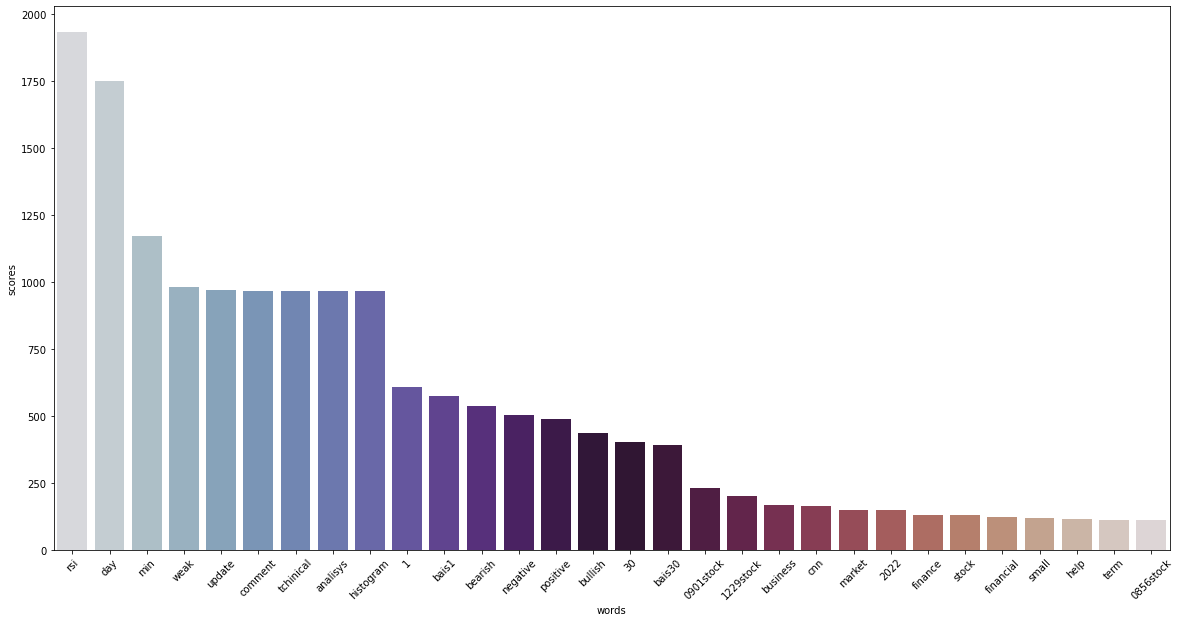

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df,palette='twilight')
plt.xticks(rotation=45)
plt.show()


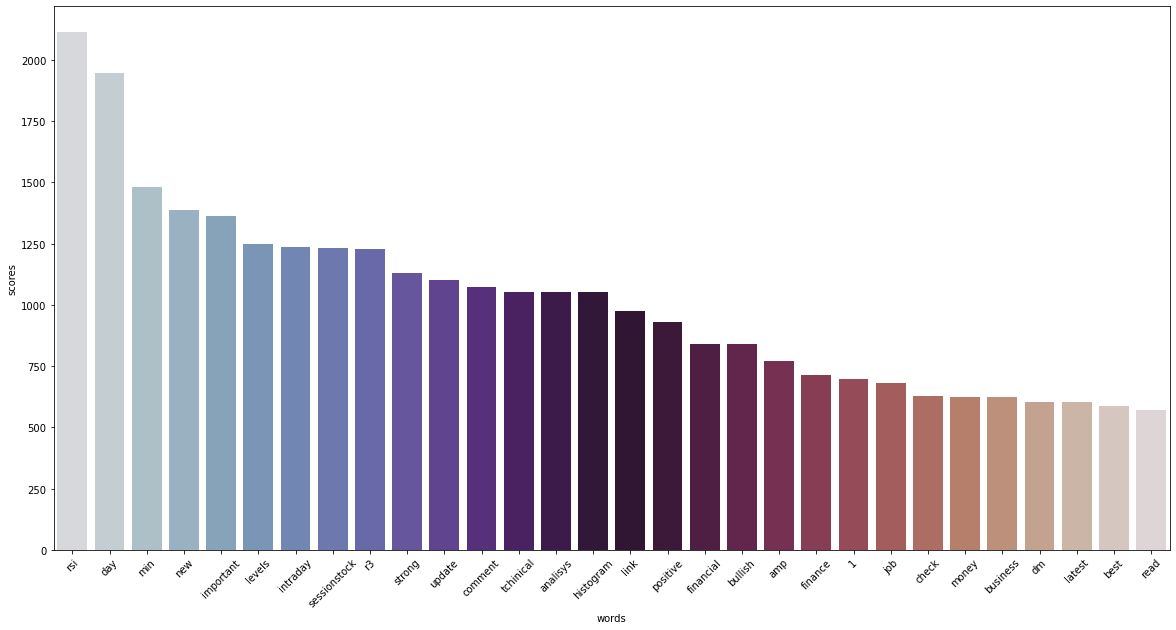

In [72]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df,palette='twilight')
plt.xticks(rotation=45)
plt.show()


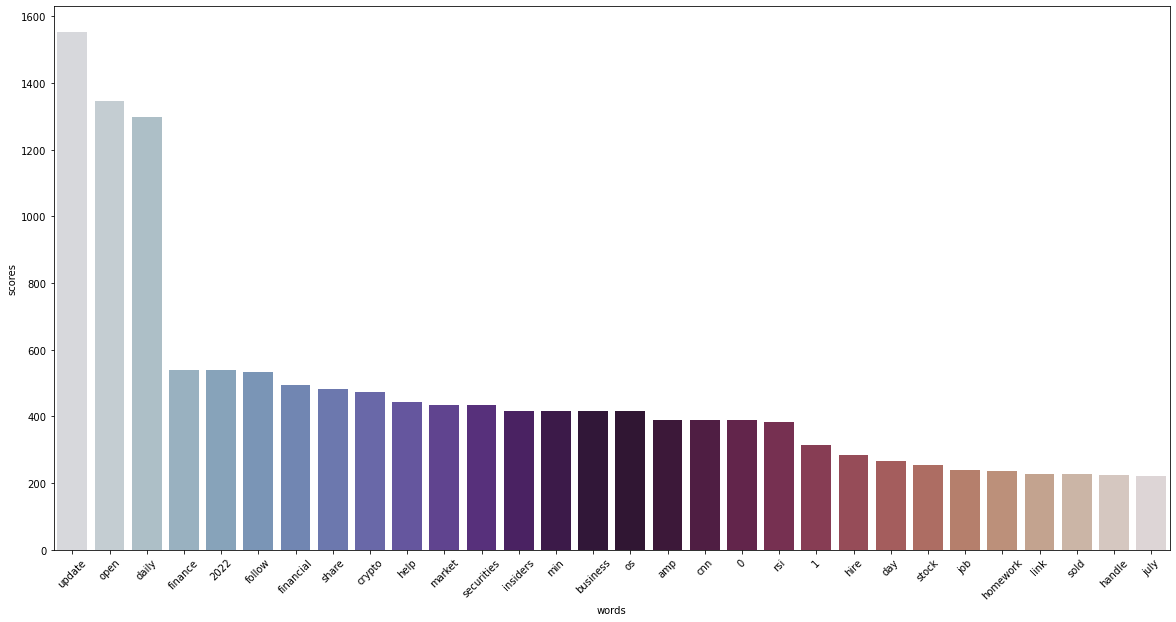

In [73]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df,palette='twilight')
plt.xticks(rotation=45)
plt.show()
